# White Walkers Responsible AI Project

Installing required libraries

In [1]:
# pip install diffprivlib

In [2]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from scipy import spatial
from sklearn import metrics
from sklearn import ensemble
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report
from sklearn.metrics import average_precision_score
from sklearn.metrics import roc_auc_score, average_precision_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from diffprivlib.models import LogisticRegression
from diffprivlib.models import RandomForestClassifier


# from functions import *
# from fair_func import *
# from fair_metrics import *

# pd.set_option('display.max_rows', 500)
# pd.set_option('display.max_columns', 25)

Loading dataset off the UCI website

In [3]:
data = pd.read_excel('https://archive.ics.uci.edu/ml/machine-learning-databases/00350/default%20of%20credit%20card%20clients.xls')

In [4]:
df = data.copy()

In [5]:
df.columns = df.iloc[0]
df = df[1:]
df = df.drop(columns='ID',axis=1)
df = df.apply(pd.to_numeric, errors='coerce')

In [6]:
df_copy = df.copy()

# Data Description
(Link - https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients)

#### Data Description
* ID: ID of each client
* LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit
* SEX: Gender (1=male, 2=female)
* EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
* MARRIAGE: Marital status (1=married, 2=single, 3=others)
* AGE: Age in years <br><br>
* PAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, ... 8=payment delay for eight months, 9=payment delay for * nine * months and above) (-2 no credit to pay, 0 payment being made on time but not the total amount to clear the balance)
* PAY_2: Repayment status in August, 2005 (scale same as above)
* PAY_3: Repayment status in July, 2005 (scale same as above)
* PAY_4: Repayment status in June, 2005 (scale same as above)
* PAY_5: Repayment status in May, 2005 (scale same as above)
* PAY_6: Repayment status in April, 2005 (scale same as above) <br><br>
* BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)
* BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)
* BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)
* BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)
* BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)
* BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar) <br><br>
* PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)
* PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)
* PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)
* PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)
* PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)
* PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar) <br><br>
* default.payment.next.month: Default payment (1=yes, 0=no)

# Exploratory Data Analysis

In [7]:
df_copy.shape

(30000, 24)

In [8]:
df_copy.isnull().sum()

0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

In [9]:
df_copy.describe().T

,count,mean,std,min,25%,50%,75%,max
0,,,,,,,,
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
SEX,30000.0,1.603733,0.489129,1.0,1.00,2.0,2.00,2.0
EDUCATION,30000.0,1.853133,0.790349,0.0,1.00,2.0,2.00,6.0
MARRIAGE,30000.0,1.551867,0.521970,0.0,1.00,2.0,2.00,3.0
AGE,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
PAY_0,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
PAY_2,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0
PAY_3,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0
PAY_4,30000.0,-0.220667,1.169139,-2.0,-1.00,0.0,0.00,8.0


In [10]:
df_copy['default payment next month'].value_counts()

0    23364
1     6636
Name: default payment next month, dtype: int64

In [11]:
df_copy.head(5).T

,1,2,3,4,5
0,,,,,
LIMIT_BAL,20000,120000,90000,50000,50000
SEX,2,2,2,2,1
EDUCATION,2,2,2,2,2
MARRIAGE,1,2,2,1,1
AGE,24,26,34,37,57
PAY_0,2,-1,0,0,-1
PAY_2,2,2,0,0,0
PAY_3,-1,0,0,0,-1
PAY_4,-1,0,0,0,0


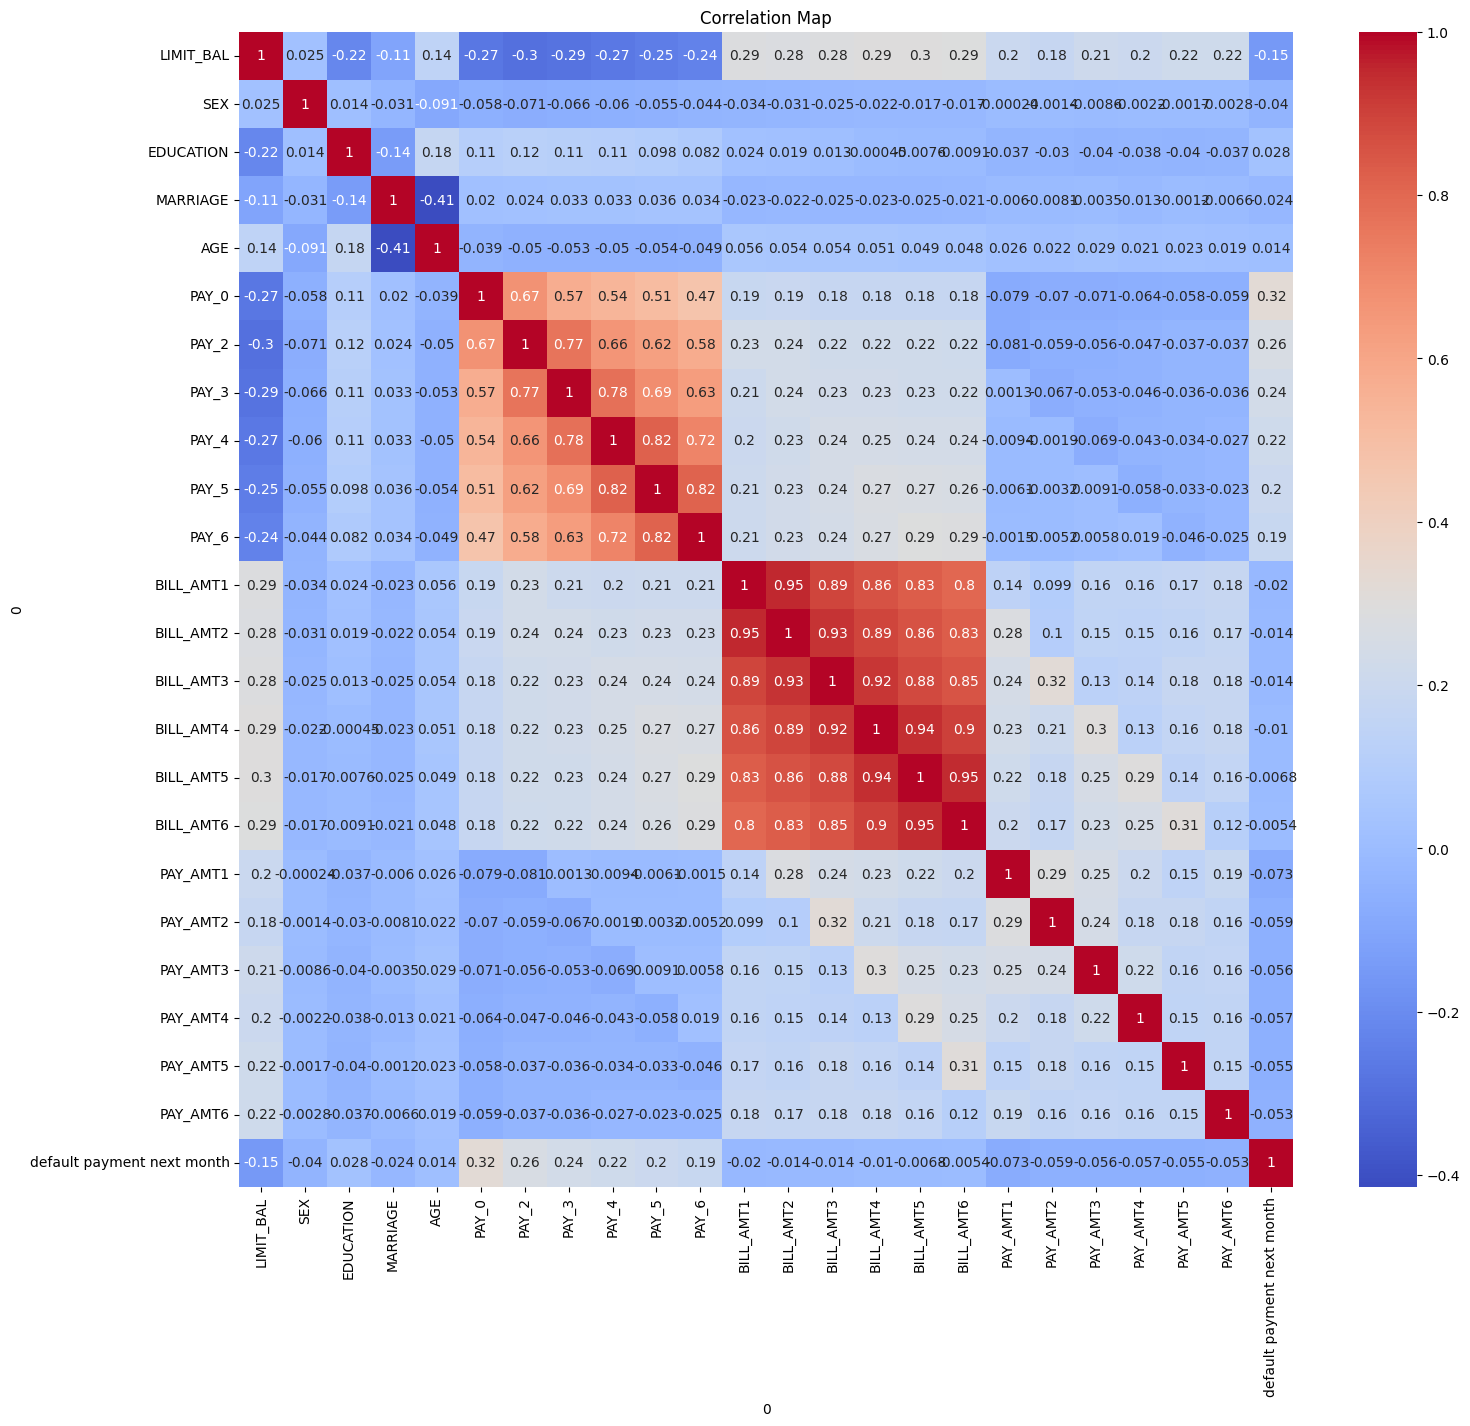

In [12]:
corr = df.corr()
fig, ax = plt.subplots(figsize=(17, 15))
sns.heatmap(corr, annot=True, cmap='coolwarm', ax=ax)
plt.title('Correlation Map')
plt.show()

array([[<AxesSubplot: title={'center': 'LIMIT_BAL'}>,
        <AxesSubplot: title={'center': 'SEX'}>,
        <AxesSubplot: title={'center': 'EDUCATION'}>,
        <AxesSubplot: title={'center': 'MARRIAGE'}>,
        <AxesSubplot: title={'center': 'AGE'}>],
       [<AxesSubplot: title={'center': 'PAY_0'}>,
        <AxesSubplot: title={'center': 'PAY_2'}>,
        <AxesSubplot: title={'center': 'PAY_3'}>,
        <AxesSubplot: title={'center': 'PAY_4'}>,
        <AxesSubplot: title={'center': 'PAY_5'}>],
       [<AxesSubplot: title={'center': 'PAY_6'}>,
        <AxesSubplot: title={'center': 'BILL_AMT1'}>,
        <AxesSubplot: title={'center': 'BILL_AMT2'}>,
        <AxesSubplot: title={'center': 'BILL_AMT3'}>,
        <AxesSubplot: title={'center': 'BILL_AMT4'}>],
       [<AxesSubplot: title={'center': 'BILL_AMT5'}>,
        <AxesSubplot: title={'center': 'BILL_AMT6'}>,
        <AxesSubplot: title={'center': 'PAY_AMT1'}>,
        <AxesSubplot: title={'center': 'PAY_AMT2'}>,
        <A

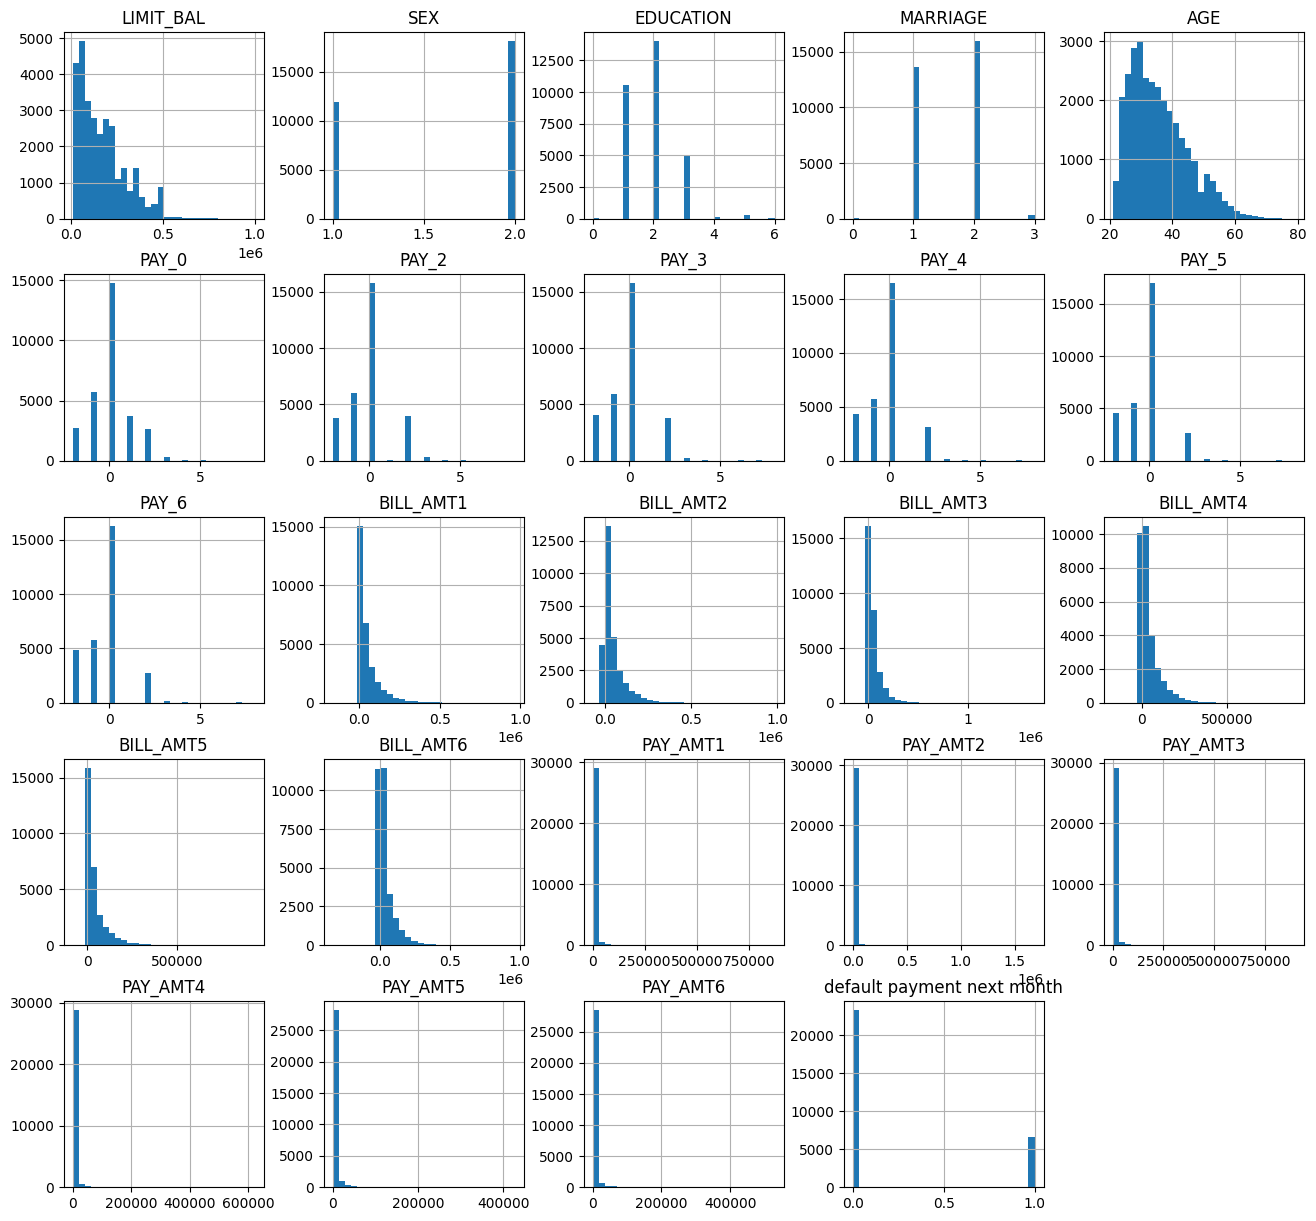

In [13]:
df.hist(bins=30, figsize=(16, 15))

Checking distribution of PII data with respect to target variable

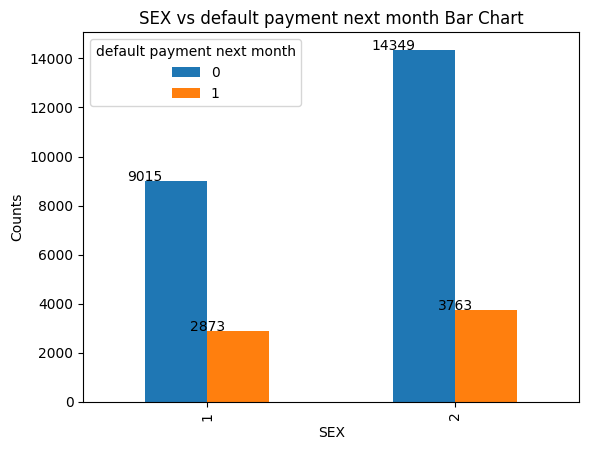

In [14]:
# Group the data by the Feature column and calculate the number of occurrences of each Target value
grouped = df_copy.groupby(['SEX', 'default payment next month']).size().reset_index(name='Counts')

# Create a pivot table to reshape the data into a format that can be plotted as a bar chart
pivot = grouped.pivot(index='SEX', columns='default payment next month', values='Counts')

# Plot the bar chart
ax = pivot.plot(kind='bar', stacked=False)

for i in range(len(pivot.index)):
    for j in range(len(pivot.columns)):
        value = pivot.iloc[i, j]
        x = i - 0.25 + j * 0.25
        y = value + 0.25
        ax.text(x, y, value, ha='center', fontsize=10)

# Add labels and title to the chart
plt.xlabel('SEX')
plt.ylabel('Counts')
plt.title('SEX vs default payment next month Bar Chart')

# Show the plot
plt.show()

posx and posy should be finite values
posx and posy should be finite values


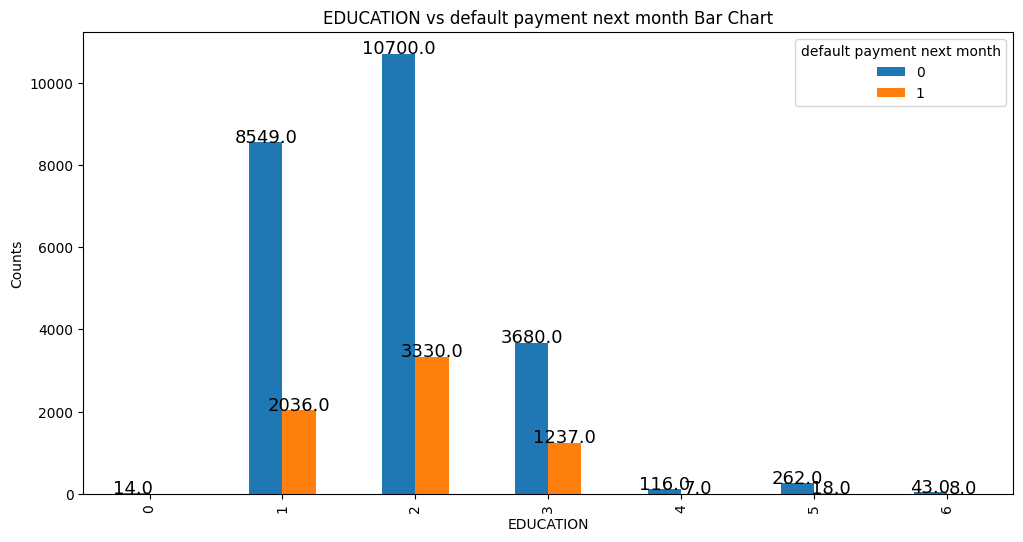

In [15]:
# Group the data by the Feature column and calculate the number of occurrences of each Target value
grouped = df_copy.groupby(['EDUCATION', 'default payment next month']).size().reset_index(name='Counts')

# Create a pivot table to reshape the data into a format that can be plotted as a bar chart
pivot = grouped.pivot(index='EDUCATION', columns='default payment next month', values='Counts')

# Plot the bar chart
fig, ax = plt.subplots(figsize=(12, 6))
pivot.plot(kind='bar', stacked=False, ax=ax)

for i in range(len(pivot.index)):
    for j in range(len(pivot.columns)):
        value = pivot.iloc[i, j]
        x = i - 0.125 + j * 0.25
        y = value
        ax.text(x, y, value, ha='center', fontsize=13)

# Add labels and title to the chart
plt.xlabel('EDUCATION')
plt.ylabel('Counts')
plt.title('EDUCATION vs default payment next month Bar Chart')

# Show the plot
plt.show()

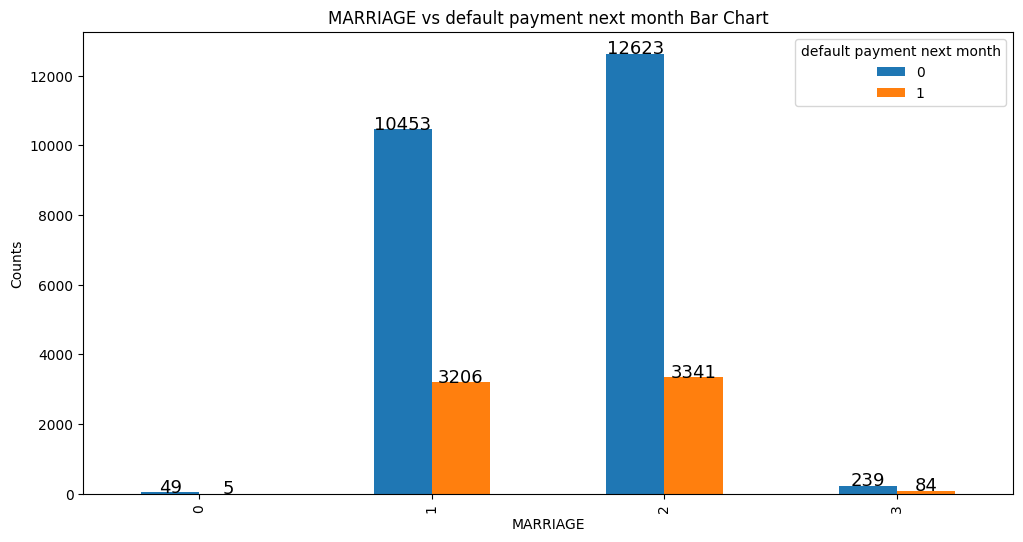

In [16]:
# Group the data by the Feature column and calculate the number of occurrences of each Target value
grouped = df_copy.groupby(['MARRIAGE', 'default payment next month']).size().reset_index(name='Counts')

# Create a pivot table to reshape the data into a format that can be plotted as a bar chart
pivot = grouped.pivot(index='MARRIAGE', columns='default payment next month', values='Counts')

# Plot the bar chart
fig, ax = plt.subplots(figsize=(12, 6))
pivot.plot(kind='bar', stacked=False, ax=ax)

for i in range(len(pivot.index)):
    for j in range(len(pivot.columns)):
        value = pivot.iloc[i, j]
        x = i - 0.125 + j * 0.25
        y = value
        ax.text(x, y, value, ha='center', fontsize=13)

# Add labels and title to the chart
plt.xlabel('MARRIAGE')
plt.ylabel('Counts')
plt.title('MARRIAGE vs default payment next month Bar Chart')

# Show the plot
plt.show()

Checking cosine similarity between features

cosine distance between Feature 1 and Feature 2 0.760576786212806
cosine distance between Feature 1 and Feature 3 0.6745164412713751
cosine distance between Feature 1 and Feature 4 0.7281805889902317
cosine distance between Feature 1 and Feature 5 0.787428778148937
cosine distance between Feature 1 and Feature 6 -0.17782255263579927
cosine distance between Feature 1 and Feature 7 -0.268170381780392
cosine distance between Feature 1 and Feature 8 -0.28229395841823224
cosine distance between Feature 1 and Feature 9 -0.307575804212719
cosine distance between Feature 1 and Feature 10 -0.32948368006494366
cosine distance between Feature 1 and Feature 11 -0.3336280757480026
cosine distance between Feature 1 and Feature 12 0.5949400071587823
cosine distance between Feature 1 and Feature 13 0.5896243968173848
cosine distance between Feature 1 and Feature 14 0.5871753583884125
cosine distance between Feature 1 and Feature 15 0.590557196837484
cosine distance between Feature 1 and Feature 16 0.5

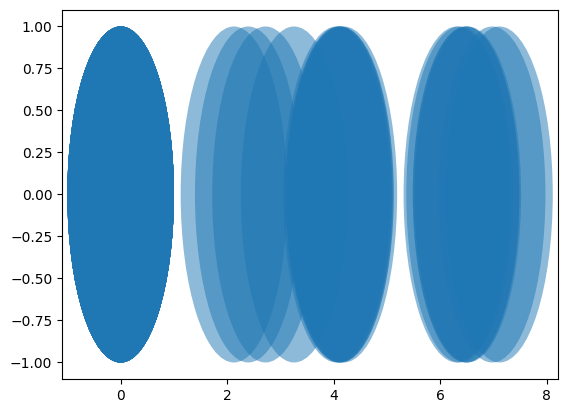

In [17]:
for i in np.arange(1,24):

    result = 1 - spatial.distance.cosine(df_copy['LIMIT_BAL'], df_copy.iloc[:,i])
    print ('cosine distance between Feature 1 and Feature {}'.format(i+1), result)
    
    r = 1
    d = 10 * r * (1 - result)

    circle1=plt.Circle((0, 0), r, alpha=.5)
    circle2=plt.Circle((d, 0), r, alpha=.5)

    plt.ylim([-1.1, 1.1])
    plt.xlim([-1.1, 1.1 + d])
    fig = plt.gcf()
    fig.gca().add_artist(circle1)
    fig.gca().add_artist(circle2)

Function to display model results

In [18]:
def results(y_test, y_pred, y_pred_prob):
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy:", accuracy)

    auc = roc_auc_score(y_test, y_pred_prob)
    print("AUC:", auc)

    gini = 2*auc - 1
    print("Gini:", gini)

    # avg_precision = average_precision_score(y_test, y_pred_prob)
    # print("Avg Precision Score:", avg_precision)

    precision = precision_score(y_test, y_pred)
    print("Precision:", precision)

    sensitivity = recall_score(y_test, y_pred)
    print("Sensitivity (Recall):", sensitivity)

    false_negative_rate = 1 - sensitivity
    print("False Negative Rate:", false_negative_rate)

    f1 = f1_score(y_test, y_pred)
    print("F1 Score:", f1)

# Model Phase 1
Raw models on Raw data

In [19]:
x = df.drop(columns=['default payment next month']) #columns dropped as it is target variable
y = df['default payment next month']

In [20]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=6699)

In [21]:
# Logistic regression model
logreg = LogisticRegression(random_state=0, solver='liblinear')
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
y_pred_prob = logreg.predict_proba(X_test)[:,1] #
# y_pred_prob = logreg.predict_proba(X_test)[:,0] #

results(y_test, y_pred, y_pred_prob)

c:\Users\coola\AppData\Local\Programs\Python\Python310\lib\site-packages\diffprivlib\utils.py:71: DiffprivlibCompatibilityWarning: Parameter 'solver' is not functional in diffprivlib.  Remove this parameter to suppress this warning.
  warnings.warn(f"Parameter '{arg}' is not functional in diffprivlib.  Remove this parameter to suppress this "
c:\Users\coola\AppData\Local\Programs\Python\Python310\lib\site-packages\diffprivlib\models\logistic_regression.py:239: PrivacyLeakWarning: Data norm has not been specified and will be calculated on the data provided.  This will result in additional privacy leakage. To ensure differential privacy and no additional privacy leakage, specify `data_norm` at initialisation.
  warnings.warn("Data norm has not been specified and will be calculated on the data provided.  This will "


Accuracy: 0.6966666666666667
AUC: 0.5365823011442243
Gini: 0.07316460228844868
Precision: 0.28130360205831906
Sensitivity (Recall): 0.250381679389313
False Negative Rate: 0.749618320610687
F1 Score: 0.2649434571890146


In [22]:
# Random Forest model
clf = RandomForestClassifier()
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
y_pred_prob = clf.predict_proba(X_test)[:,1] #

results(y_test, y_pred, y_pred_prob)

c:\Users\coola\AppData\Local\Programs\Python\Python310\lib\site-packages\diffprivlib\models\forest.py:190: PrivacyLeakWarning: Bounds have not been specified and will be calculated on the data provided. This will result in additional privacy leakage. To ensure differential privacy and no additional privacy leakage, specify bounds for each dimension.
  warnings.warn("Bounds have not been specified and will be calculated on the data provided. This will "
c:\Users\coola\AppData\Local\Programs\Python\Python310\lib\site-packages\diffprivlib\models\forest.py:209: PrivacyLeakWarning: Classes have not been specified and will be calculated on the data provided. This will result in additional privacy leakage. To ensure differential privacy and no additional privacy leakage, specify the prediction classes for model.
  warnings.warn("Classes have not been specified and will be calculated on the data provided. This will "


Accuracy: 0.7817777777777778
AUC: 0.5146233572233345
Gini: 0.029246714446669042
Precision: 1.0
Sensitivity (Recall): 0.0005089058524173028
False Negative Rate: 0.9994910941475827
F1 Score: 0.001017293997965412


# Model Phase 2
Drop Personal Identifiable Information - Gender, Marriage, Sex and Education <br>
4 Models on Raw Data without PII data

In [23]:
df_dropped_sm = df.drop(['SEX','MARRIAGE', 'EDUCATION', 'AGE' ],axis=1)

In [24]:
x = df_dropped_sm.drop(columns=['default payment next month']) #columns dropped as it is target variable
y = df_dropped_sm['default payment next month']

In [25]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=6699)

In [26]:
# Logistic regression model on As-is data with PII data removed

logreg = LogisticRegression(random_state=0, solver='liblinear')
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
y_pred_prob = logreg.predict_proba(X_test)[:,1] #

results(y_test, y_pred, y_pred_prob)

c:\Users\coola\AppData\Local\Programs\Python\Python310\lib\site-packages\diffprivlib\utils.py:71: DiffprivlibCompatibilityWarning: Parameter 'solver' is not functional in diffprivlib.  Remove this parameter to suppress this warning.
  warnings.warn(f"Parameter '{arg}' is not functional in diffprivlib.  Remove this parameter to suppress this "
c:\Users\coola\AppData\Local\Programs\Python\Python310\lib\site-packages\diffprivlib\models\logistic_regression.py:239: PrivacyLeakWarning: Data norm has not been specified and will be calculated on the data provided.  This will result in additional privacy leakage. To ensure differential privacy and no additional privacy leakage, specify `data_norm` at initialisation.
  warnings.warn("Data norm has not been specified and will be calculated on the data provided.  This will "


Accuracy: 0.6884444444444444
AUC: 0.5302088611829981
Gini: 0.060417722365996296
Precision: 0.27038861521620144
Sensitivity (Recall): 0.2513994910941476
False Negative Rate: 0.7486005089058524
F1 Score: 0.2605485232067511


In [27]:
# DP Logistic regression model on As-is data with PII Data removed

dp_logreg = LogisticRegression()
dp_logreg.fit(X_train, y_train)
y_pred = dp_logreg.predict(X_test)
y_pred_prob = dp_logreg.predict_proba(X_test)[:,1] #

results(y_test, y_pred, y_pred_prob)

Accuracy: 0.6832222222222222
AUC: 0.5022830594392631
Gini: 0.004566118878526204
Precision: 0.22208281053952322
Sensitivity (Recall): 0.1801526717557252
False Negative Rate: 0.8198473282442749
F1 Score: 0.1989322843495364


c:\Users\coola\AppData\Local\Programs\Python\Python310\lib\site-packages\diffprivlib\models\logistic_regression.py:239: PrivacyLeakWarning: Data norm has not been specified and will be calculated on the data provided.  This will result in additional privacy leakage. To ensure differential privacy and no additional privacy leakage, specify `data_norm` at initialisation.
  warnings.warn("Data norm has not been specified and will be calculated on the data provided.  This will "


In [28]:
# Random Forest model on As-is data with PII Data removed
clf = RandomForestClassifier()
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
y_pred_prob = clf.predict_proba(X_test)[:,1] #

results(y_test, y_pred, y_pred_prob)

c:\Users\coola\AppData\Local\Programs\Python\Python310\lib\site-packages\diffprivlib\models\forest.py:190: PrivacyLeakWarning: Bounds have not been specified and will be calculated on the data provided. This will result in additional privacy leakage. To ensure differential privacy and no additional privacy leakage, specify bounds for each dimension.
  warnings.warn("Bounds have not been specified and will be calculated on the data provided. This will "
c:\Users\coola\AppData\Local\Programs\Python\Python310\lib\site-packages\diffprivlib\models\forest.py:209: PrivacyLeakWarning: Classes have not been specified and will be calculated on the data provided. This will result in additional privacy leakage. To ensure differential privacy and no additional privacy leakage, specify the prediction classes for model.
  warnings.warn("Classes have not been specified and will be calculated on the data provided. This will "


Accuracy: 0.782
AUC: 0.7250394700434577
Gini: 0.4500789400869154
Precision: 0.5882352941176471
Sensitivity (Recall): 0.005089058524173028
False Negative Rate: 0.9949109414758269
F1 Score: 0.010090817356205851


In [29]:
dp_clf = RandomForestClassifier(n_estimators=10,random_state=30, epsilon=0.3,n_jobs=1,verbose=0,accountant=None,max_depth=5,feature_domain=None)
dp_clf.fit(X_train, y_train)
y_pred = dp_clf.predict(X_test)
y_pred_prob = dp_clf.predict_proba(X_test)[:,1] #

results(y_test, y_pred, y_pred_prob)

c:\Users\coola\AppData\Local\Programs\Python\Python310\lib\site-packages\diffprivlib\utils.py:71: DiffprivlibCompatibilityWarning: Parameter 'feature_domain' is not functional in diffprivlib.  Remove this parameter to suppress this warning.
  warnings.warn(f"Parameter '{arg}' is not functional in diffprivlib.  Remove this parameter to suppress this "
c:\Users\coola\AppData\Local\Programs\Python\Python310\lib\site-packages\diffprivlib\models\forest.py:190: PrivacyLeakWarning: Bounds have not been specified and will be calculated on the data provided. This will result in additional privacy leakage. To ensure differential privacy and no additional privacy leakage, specify bounds for each dimension.
  warnings.warn("Bounds have not been specified and will be calculated on the data provided. This will "
c:\Users\coola\AppData\Local\Programs\Python\Python310\lib\site-packages\diffprivlib\models\forest.py:209: PrivacyLeakWarning: Classes have not been specified and will be calculated on the d

Accuracy: 0.7822222222222223
AUC: 0.6504949624831133
Gini: 0.3009899249662267
Precision: 0.5925925925925926
Sensitivity (Recall): 0.008142493638676845
False Negative Rate: 0.9918575063613232
F1 Score: 0.016064257028112452


# Model Phase 3
4 Models on DP Data<br>

We have defined sensitivity as the maximum limit balance divided by the number of data entries

In [30]:
# sensitivity = ((df_dropped_sm['AGE'][df_dropped_sm['AGE'] >= 35]).max())/(len(df_dropped_sm)+1)
sensitivity = ((df_dropped_sm['LIMIT_BAL'][df_dropped_sm['LIMIT_BAL'] >= 167300]).max())/(len(df_dropped_sm)+1)
# sensitivity = 1
epsilon = 0.3

limit_bal_noise = [x + np.random.laplace(0, 1/epsilon) for x in df_dropped_sm['LIMIT_BAL']]
# noised = df_dropped_sm['AGE'] + np.random.laplace(loc=0, scale=sensitivity/epsilon)

In [31]:
df_dropped_sm['NOISY_LIMIT_BAL'] = limit_bal_noise

In [32]:
df_dropped_sm

,LIMIT_BAL,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,...,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,NOISY_LIMIT_BAL
1,20000,2,2,-1,-1,-2,-2,3913,3102,689,...,0,0,0,689,0,0,0,0,1,20004.688442
2,120000,-1,2,0,0,0,2,2682,1725,2682,...,3455,3261,0,1000,1000,1000,0,2000,1,119994.793378
3,90000,0,0,0,0,0,0,29239,14027,13559,...,14948,15549,1518,1500,1000,1000,1000,5000,0,89999.702256
4,50000,0,0,0,0,0,0,46990,48233,49291,...,28959,29547,2000,2019,1200,1100,1069,1000,0,49997.521723
5,50000,-1,0,-1,0,0,0,8617,5670,35835,...,19146,19131,2000,36681,10000,9000,689,679,0,50003.309327
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,220000,0,0,0,0,0,0,188948,192815,208365,...,31237,15980,8500,20000,5003,3047,5000,1000,0,219997.558685
29997,150000,-1,-1,-1,-1,0,0,1683,1828,3502,...,5190,0,1837,3526,8998,129,0,0,0,150001.942630
29998,30000,4,3,2,-1,0,0,3565,3356,2758,...,20582,19357,0,0,22000,4200,2000,3100,1,29990.130880
29999,80000,1,-1,0,0,0,-1,-1645,78379,76304,...,11855,48944,85900,3409,1178,1926,52964,1804,1,79986.075396


In [33]:
df_dropped_sm1= df.copy()

In [34]:
x = df_dropped_sm1.drop(columns=['EDUCATION', 'AGE' ,'default payment next month','LIMIT_BAL']) #columns dropped
y = df_dropped_sm1['default payment next month']

In [35]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=6699)

In [36]:
# Logistic regression model on DP data (Age noise)

logreg = LogisticRegression(random_state=0, solver='liblinear')
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
y_pred_prob = logreg.predict_proba(X_test)[:,1] #

results(y_test, y_pred, y_pred_prob)

Accuracy: 0.5121111111111111
AUC: 0.4680884201312594
Gini: -0.0638231597374812
Precision: 0.19476597886260694
Sensitivity (Recall): 0.3938931297709924
False Negative Rate: 0.6061068702290076
F1 Score: 0.2606499410675198


c:\Users\coola\AppData\Local\Programs\Python\Python310\lib\site-packages\diffprivlib\utils.py:71: DiffprivlibCompatibilityWarning: Parameter 'solver' is not functional in diffprivlib.  Remove this parameter to suppress this warning.
  warnings.warn(f"Parameter '{arg}' is not functional in diffprivlib.  Remove this parameter to suppress this "
c:\Users\coola\AppData\Local\Programs\Python\Python310\lib\site-packages\diffprivlib\models\logistic_regression.py:239: PrivacyLeakWarning: Data norm has not been specified and will be calculated on the data provided.  This will result in additional privacy leakage. To ensure differential privacy and no additional privacy leakage, specify `data_norm` at initialisation.
  warnings.warn("Data norm has not been specified and will be calculated on the data provided.  This will "


In [37]:
# DP Logistic regression model on DP data (AGE noise)

dp_logreg = LogisticRegression()
dp_logreg.fit(X_train, y_train)
y_pred = dp_logreg.predict(X_test)
y_pred_prob = dp_logreg.predict_proba(X_test)[:,1] #

results(y_test, y_pred, y_pred_prob)

c:\Users\coola\AppData\Local\Programs\Python\Python310\lib\site-packages\diffprivlib\models\logistic_regression.py:239: PrivacyLeakWarning: Data norm has not been specified and will be calculated on the data provided.  This will result in additional privacy leakage. To ensure differential privacy and no additional privacy leakage, specify `data_norm` at initialisation.
  warnings.warn("Data norm has not been specified and will be calculated on the data provided.  This will "


Accuracy: 0.7017777777777777
AUC: 0.5712045732804535
Gini: 0.14240914656090697
Precision: 0.3236880823933301
Sensitivity (Recall): 0.33587786259541985
False Negative Rate: 0.6641221374045801
F1 Score: 0.3296703296703297


In [38]:
# Random Forest model on DP data (LIMIT_BAL noise)
clf = RandomForestClassifier()
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
y_pred_prob = clf.predict_proba(X_test)[:,1] #

results(y_test, y_pred, y_pred_prob)

c:\Users\coola\AppData\Local\Programs\Python\Python310\lib\site-packages\diffprivlib\models\forest.py:190: PrivacyLeakWarning: Bounds have not been specified and will be calculated on the data provided. This will result in additional privacy leakage. To ensure differential privacy and no additional privacy leakage, specify bounds for each dimension.
  warnings.warn("Bounds have not been specified and will be calculated on the data provided. This will "
c:\Users\coola\AppData\Local\Programs\Python\Python310\lib\site-packages\diffprivlib\models\forest.py:209: PrivacyLeakWarning: Classes have not been specified and will be calculated on the data provided. This will result in additional privacy leakage. To ensure differential privacy and no additional privacy leakage, specify the prediction classes for model.
  warnings.warn("Classes have not been specified and will be calculated on the data provided. This will "


Accuracy: 0.7816666666666666
AUC: 0.6773565469634742
Gini: 0.3547130939269485
Precision: 0.0
Sensitivity (Recall): 0.0
False Negative Rate: 1.0
F1 Score: 0.0


c:\Users\coola\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [39]:
dp_clf = RandomForestClassifier(n_estimators=10,random_state=30, epsilon=0.3,n_jobs=1,verbose=0,accountant=None,max_depth=5,feature_domain=None)
dp_clf.fit(X_train, y_train)
y_pred = dp_clf.predict(X_test)
y_pred_prob = dp_clf.predict_proba(X_test)[:,1] #

results(y_test, y_pred, y_pred_prob)

c:\Users\coola\AppData\Local\Programs\Python\Python310\lib\site-packages\diffprivlib\utils.py:71: DiffprivlibCompatibilityWarning: Parameter 'feature_domain' is not functional in diffprivlib.  Remove this parameter to suppress this warning.
  warnings.warn(f"Parameter '{arg}' is not functional in diffprivlib.  Remove this parameter to suppress this "
c:\Users\coola\AppData\Local\Programs\Python\Python310\lib\site-packages\diffprivlib\models\forest.py:190: PrivacyLeakWarning: Bounds have not been specified and will be calculated on the data provided. This will result in additional privacy leakage. To ensure differential privacy and no additional privacy leakage, specify bounds for each dimension.
  warnings.warn("Bounds have not been specified and will be calculated on the data provided. This will "
c:\Users\coola\AppData\Local\Programs\Python\Python310\lib\site-packages\diffprivlib\models\forest.py:209: PrivacyLeakWarning: Classes have not been specified and will be calculated on the d

Accuracy: 0.7821111111111111
AUC: 0.6696566603550768
Gini: 0.3393133207101535
Precision: 0.75
Sensitivity (Recall): 0.0030534351145038168
False Negative Rate: 0.9969465648854962
F1 Score: 0.006082108464267613


# Reweight of Data

In [40]:
df_rw = df.copy()

In [41]:
# SEX: Gender (1=male, 2=female)
# MARRIAGE: (1=married, 2=single)

In [42]:
pii_data = ['EDUCATION', 'SEX', 'MARRIAGE', 'AGE']
others = df - df[pii_data]
target = 'default payment next month'

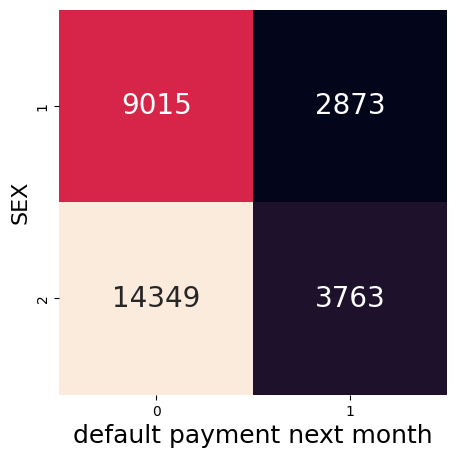

In [43]:
plt.subplots(figsize=(5,5))
plotdf=pd.crosstab(df_rw['SEX'], df_rw['default payment next month'], rownames=['SEX'])
ax=sns.heatmap(plotdf, annot=True, fmt='g', cbar=False, annot_kws={'size':20})    #axes.plot(vc)
plt.xlabel('default payment next month', fontsize=18)
plt.ylabel('SEX', fontsize=16)

plt.show()    #axes.plot(vc)
plt.show()

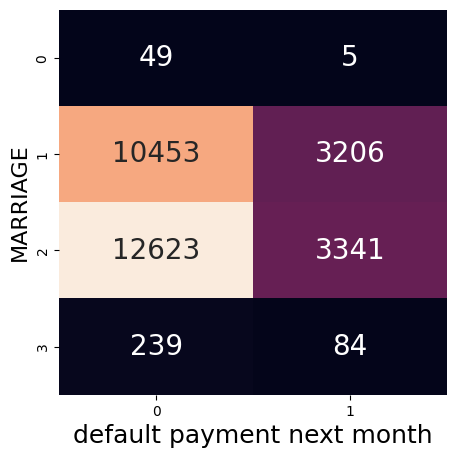

In [44]:
plt.subplots(figsize=(5,5))
plotdf=pd.crosstab(df_rw['MARRIAGE'], df_rw['default payment next month'], rownames=['MARRIAGE'])
ax=sns.heatmap(plotdf, annot=True, fmt='g', cbar=False, annot_kws={'size':20})    #axes.plot(vc)
plt.xlabel('default payment next month', fontsize=18)
plt.ylabel('MARRIAGE', fontsize=16)

plt.show()    #axes.plot(vc)
plt.show()

In [45]:
#GENDER, MARRIAGE
fav=0
unfav= 1
#apart from SEX and MARRIAGE no other PII columns are binary categorical

In [46]:
def Reweighing1(data, choice, target_feature, pval, upval, fav=0, unfav=1):


    dummy = np.repeat(1, len(data)) 
    data['dummy'] = dummy

    n = np.sum(data['dummy']) #Total number of instances
    sa = np.sum(data['dummy'][data[choice]==pval]) #Total number of privileged
    sd = np.sum(data['dummy'][data[choice]==upval]) #Total number of unprivileged
    ypos = np.sum(data['dummy'][data[target_feature]==fav]) #Total number of favourable
    yneg = np.sum(data['dummy'][data[target_feature]==unfav]) #Total number of unfavourable
    print("Total Advantegous: {}, Total Disdvantegous: {}, Total Favourable: {}, Total Unavourable: {}"
      .format(sa, sd, ypos, yneg))
    
    data_sa_ypos = data[(data[choice]==pval) & (data[target_feature]==fav)] # priviliged and favourable
    data_sa_yneg = data[(data[choice]==pval) & (data[target_feature]==unfav)] # priviliged and unfavourable
    data_sd_ypos = data[(data[choice]==upval) & (data[target_feature]==fav)] # unpriviliged and favourable
    data_sd_yneg = data[(data[choice]==upval) & (data[target_feature]==unfav)] # unpriviliged and unfavourable

    sa_ypos = np.sum(data_sa_ypos['dummy']) #Total number of privileged and favourable
    sa_yneg = np.sum(data_sa_yneg['dummy']) #Total number of privileged and unfavourable
    sd_ypos = np.sum(data_sd_ypos['dummy']) #Total number of unprivileged and favourable
    sd_yneg = np.sum(data_sd_yneg['dummy']) #Total number of unprivileged and unfavourable
    print("Total number of the Advantaged and Favourable Group: {}".format(sa_ypos))  
    print("Total number of Advantaged and Unfavourable Group: {}".format(sa_yneg))
    print("Total number of Disadvantaged and Favourable Group: {}".format(sd_ypos))
    print("Total number of Disadvantaged and Unfavourable Group: {}".format(sd_yneg))

    w_sa_ypos= (ypos*sa) / (n*sa_ypos) #weight for privileged and favourable
    w_sa_yneg = (yneg*sa) / (n*sa_yneg) #weight for privileged and unfavourable
    w_sd_ypos = (ypos*sd) / (n*sd_ypos) #weight for unprivileged and favourable
    w_sd_yneg = (yneg*sd) / (n*sd_yneg) #weight for unprivileged and unfavourable
    print("Weights for the Advantaged and Favourable Group: {}".format(w_sa_ypos))
    print("Weights for the Advantaged and Unfavourable Group: {}".format(w_sa_yneg))
    print("Weights for the Disadvantaged and Favourable Group: {}".format(w_sd_ypos))
    print("Weights for the Disadvantaged and Unfavourable Group: {}".format(w_sd_yneg))

    datatest=data #.copy()
    
    # print (w_sa_ypos, w_sa_yneg, w_sd_ypos, w_sd_yneg)
    
    DiscriminationBefore=(sa_ypos/sa)-(sd_ypos/sd)
    DiscriminationAfter=(sa_ypos/sa * w_sa_ypos)-(sd_ypos/sd * w_sd_ypos)


    # print (DiscriminationBefore, DiscriminationAfter)
    print("Discrimination Before: {}, Discrimination After: {}".format(abs(DiscriminationBefore),
                                                                           abs(DiscriminationAfter)))

    datatest['Weights']= np.repeat(999, len(datatest)) 
    datatest.loc[(datatest[choice]==pval) & (datatest[target_feature]==fav), 'Weights'] = w_sa_ypos
    datatest.loc[(datatest[choice]==pval) & (datatest[target_feature]==unfav), 'Weights'] = w_sa_yneg
    datatest.loc[(datatest[choice]==upval) & (datatest[target_feature]==fav), 'Weights'] = w_sd_ypos
    datatest.loc[(datatest[choice]==upval) & (datatest[target_feature]==unfav), 'Weights'] = w_sd_yneg

    return datatest['Weights']

## Gender

In [47]:
pval = 2
upval = 1
# choice = 'SEX'
Reweighing1(df_rw,'SEX','default payment next month',pval,upval,fav,unfav)

Total Advantegous: 18112, Total Disdvantegous: 11888, Total Favourable: 23364, Total Unavourable: 6636
Total number of the Advantaged and Favourable Group: 14349
Total number of Advantaged and Unfavourable Group: 3763
Total number of Disadvantaged and Favourable Group: 9015
Total number of Disadvantaged and Unfavourable Group: 2873
Weights for the Advantaged and Favourable Group: 0.9830389295421283
Weights for the Advantaged and Unfavourable Group: 1.0646756311453627
Weights for the Disadvantaged and Favourable Group: 1.026996605657238
Weights for the Disadvantaged and Unfavourable Group: 0.9152891054646711
Discrimination Before: 0.033909465375304926, Discrimination After: 1.1102230246251565e-16


1        1.064676
2        1.064676
3        0.983039
4        0.983039
5        1.026997
           ...   
29996    1.026997
29997    1.026997
29998    0.915289
29999    0.915289
30000    0.915289
Name: Weights, Length: 30000, dtype: float64

In [48]:
x=df_rw.drop(columns=['AGE','EDUCATION','MARRIAGE','default payment next month']) # Here we dont drop sex column as we add weights to respective class
y=df_rw[target]

In [49]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=6666)

In [50]:
X_train_weights=X_train['Weights']
X_test_weights=X_test['Weights']

X_train1=X_train.drop(columns=["Weights"])
X_test1=X_test.drop(columns=["Weights"])

In [51]:
# Model with weights Logistic regression

clf_ww = LogisticRegression(random_state=0, solver='lbfgs',
                              multi_class='ovr').fit(X_train1, y_train, sample_weight=X_train_weights)

y_pred_ww = clf_ww.predict(X_test1)
y_pred_prob_ww = clf_ww.predict_proba(X_test1)[:,1]

print("Accuracy of the model with weights:", clf_ww.score(X_test1, y_test))
A_ww=clf_ww.score(X_test1[X_test1['SEX']==1], y_test[X_test1['SEX']==1])
B_ww=clf_ww.score(X_test1[X_test1['SEX']==2], y_test[X_test1['SEX']==2])
print("Accuracy difference:", abs(B_ww-A_ww)*100, "%")


auc = roc_auc_score(y_test, y_pred_prob_ww)
print("AUC:", auc)
A_ww = roc_auc_score(y_test[X_test1['SEX']==1], clf_ww.predict_proba(X_test1[X_test1['SEX']==1])[:,1])
B_ww = roc_auc_score(y_test[X_test1['SEX']==2], clf_ww.predict_proba(X_test1[X_test1['SEX']==2])[:,1])
print("AUC difference between two groups:", abs(B_ww-A_ww)*100, "%")

c:\Users\coola\AppData\Local\Programs\Python\Python310\lib\site-packages\diffprivlib\utils.py:71: DiffprivlibCompatibilityWarning: Parameter 'solver' is not functional in diffprivlib.  Remove this parameter to suppress this warning.
  warnings.warn(f"Parameter '{arg}' is not functional in diffprivlib.  Remove this parameter to suppress this "
c:\Users\coola\AppData\Local\Programs\Python\Python310\lib\site-packages\diffprivlib\utils.py:71: DiffprivlibCompatibilityWarning: Parameter 'multi_class' is not functional in diffprivlib.  Remove this parameter to suppress this warning.
  warnings.warn(f"Parameter '{arg}' is not functional in diffprivlib.  Remove this parameter to suppress this "
c:\Users\coola\AppData\Local\Programs\Python\Python310\lib\site-packages\diffprivlib\utils.py:71: DiffprivlibCompatibilityWarning: Parameter 'sample_weight' is not functional in diffprivlib.  Remove this parameter to suppress this warning.
  warnings.warn(f"Parameter '{arg}' is not functional in diffpriv

Accuracy of the model with weights: 0.6728888888888889
Accuracy difference: 2.9668279481712356 %
AUC: 0.5091056933574712
AUC difference between two groups: 0.37134073219877717 %


In [52]:
# sensitivity = ((df_rw['AGE'][df_rw['AGE'] >= 35]).max())/(len(df_rw)+1)
sensitivity = ((df_rw['LIMIT_BAL'][df_rw['LIMIT_BAL'] >= 167300]).max())/(len(df_rw)+1)
# sensitivity = 1
epsilon = 0.3

limit_bal_noise = [x + np.random.laplace(0, 1/epsilon) for x in df_rw['LIMIT_BAL']]
# noised = df_rw['AGE'] + np.random.laplace(loc=0, scale=sensitivity/epsilon)

In [53]:
df_rw['NOISY_LIMIT_BAL'] = limit_bal_noise

In [54]:
# Model with Reweight on SEX and DP on Limit balance Random Forest
# Random Forest model on DP data (LIMIT_BAL noise)
clf_ww = RandomForestClassifier(random_state=0).fit(X_train1, y_train, sample_weight=X_train_weights)

y_pred_ww = clf_ww.predict(X_test1)
y_pred_prob_ww = clf_ww.predict_proba(X_test1)[:,1]

print("Accuracy of the model with weights:", clf_ww.score(X_test1, y_test))
A_ww=clf_ww.score(X_test1[X_test1['SEX']==1], y_test[X_test1['SEX']==1])
B_ww=clf_ww.score(X_test1[X_test1['SEX']==2], y_test[X_test1['SEX']==2])
print("Accuracy difference:", abs(B_ww-A_ww)*100, "%")

auc = roc_auc_score(y_test, y_pred_prob_ww)
print("AUC:", auc)
A_ww = roc_auc_score(y_test[X_test1['SEX']==1], clf_ww.predict_proba(X_test1[X_test1['SEX']==1])[:,1])
B_ww = roc_auc_score(y_test[X_test1['SEX']==2], clf_ww.predict_proba(X_test1[X_test1['SEX']==2])[:,1])
print("AUC difference between two groups:", abs(B_ww-A_ww)*100, "%")

c:\Users\coola\AppData\Local\Programs\Python\Python310\lib\site-packages\diffprivlib\utils.py:71: DiffprivlibCompatibilityWarning: Parameter 'sample_weight' is not functional in diffprivlib.  Remove this parameter to suppress this warning.
  warnings.warn(f"Parameter '{arg}' is not functional in diffprivlib.  Remove this parameter to suppress this "
c:\Users\coola\AppData\Local\Programs\Python\Python310\lib\site-packages\diffprivlib\models\forest.py:190: PrivacyLeakWarning: Bounds have not been specified and will be calculated on the data provided. This will result in additional privacy leakage. To ensure differential privacy and no additional privacy leakage, specify bounds for each dimension.
  warnings.warn("Bounds have not been specified and will be calculated on the data provided. This will "
c:\Users\coola\AppData\Local\Programs\Python\Python310\lib\site-packages\diffprivlib\models\forest.py:209: PrivacyLeakWarning: Classes have not been specified and will be calculated on the da

Accuracy of the model with weights: 0.784
Accuracy difference: 2.4799081515499366 %
AUC: 0.6323566187863243
AUC difference between two groups: 1.2986401579760054 %


## Marriage

In [55]:
df_rw_m = df.copy()

In [56]:
# df = df[(df['MARRIAGE'] == 1) or (df['MARRIAGE'] == 2)]
df_rw_m = df_rw_m.query('MARRIAGE != 0 and MARRIAGE != 3')
df_rw_m['MARRIAGE'].value_counts()

2    15964
1    13659
Name: MARRIAGE, dtype: int64

In [57]:
pval = 2
upval = 1
# choice = 'SEX'
Reweighing1(df_rw_m,'MARRIAGE','default payment next month',pval,upval,fav,unfav)

Total Advantegous: 15964, Total Disdvantegous: 13659, Total Favourable: 23076, Total Unavourable: 6547
Total number of the Advantaged and Favourable Group: 12623
Total number of Advantaged and Unfavourable Group: 3341
Total number of Disadvantaged and Favourable Group: 10453
Total number of Disadvantaged and Unfavourable Group: 3206
Weights for the Advantaged and Favourable Group: 0.9851687528266736
Weights for the Advantaged and Unfavourable Group: 1.0560355681140075
Weights for the Disadvantaged and Favourable Group: 1.0179101533596957
Weights for the Disadvantaged and Unfavourable Group: 0.9416048555617906
Discrimination Before: 0.02543364876411569, Discrimination After: 1.1102230246251565e-16


1        0.941605
2        1.056036
3        0.985169
4        1.017910
5        1.017910
           ...   
29996    1.017910
29997    0.985169
29998    1.056036
29999    0.941605
30000    0.941605
Name: Weights, Length: 29623, dtype: float64

In [58]:
df_rw_m.head(1)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,dummy,Weights
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,689,0,0,0,0,1,1,0.941605


In [59]:
x=df_rw_m.drop(columns=['AGE','EDUCATION','SEX','default payment next month'])
y=df_rw_m[target]

In [60]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=6666)

In [61]:
X_train_weights=X_train['Weights']
X_test_weights=X_test['Weights']

X_train1=X_train.drop(columns=["Weights"])
X_test1=X_test.drop(columns=["Weights"])

In [62]:
# Model with weights Logistic regression
clf_ww = LogisticRegression(random_state=0, solver='lbfgs',
                              multi_class='ovr').fit(X_train1, y_train, sample_weight=X_train_weights)

y_pred_ww = clf_ww.predict(X_test1)
y_pred_prob_ww = clf_ww.predict_proba(X_test1)[:,1]

print("Accuracy of the model with weights:", clf_ww.score(X_test1, y_test))
A_ww=clf_ww.score(X_test1[X_test1['MARRIAGE']==1], y_test[X_test1['MARRIAGE']==1])
B_ww=clf_ww.score(X_test1[X_test1['MARRIAGE']==2], y_test[X_test1['MARRIAGE']==2])
print("Accuracy difference:", abs(B_ww-A_ww)*100, "%")


auc = roc_auc_score(y_test, y_pred_prob_ww)
print("AUC:", auc)
A_ww = roc_auc_score(y_test[X_test1['MARRIAGE']==1], clf_ww.predict_proba(X_test1[X_test1['MARRIAGE']==1])[:,1])
B_ww = roc_auc_score(y_test[X_test1['MARRIAGE']==2], clf_ww.predict_proba(X_test1[X_test1['MARRIAGE']==2])[:,1])
print("AUC difference between two groups:", abs(B_ww-A_ww)*100, "%")

c:\Users\coola\AppData\Local\Programs\Python\Python310\lib\site-packages\diffprivlib\utils.py:71: DiffprivlibCompatibilityWarning: Parameter 'solver' is not functional in diffprivlib.  Remove this parameter to suppress this warning.
  warnings.warn(f"Parameter '{arg}' is not functional in diffprivlib.  Remove this parameter to suppress this "
c:\Users\coola\AppData\Local\Programs\Python\Python310\lib\site-packages\diffprivlib\utils.py:71: DiffprivlibCompatibilityWarning: Parameter 'multi_class' is not functional in diffprivlib.  Remove this parameter to suppress this warning.
  warnings.warn(f"Parameter '{arg}' is not functional in diffprivlib.  Remove this parameter to suppress this "
c:\Users\coola\AppData\Local\Programs\Python\Python310\lib\site-packages\diffprivlib\utils.py:71: DiffprivlibCompatibilityWarning: Parameter 'sample_weight' is not functional in diffprivlib.  Remove this parameter to suppress this warning.
  warnings.warn(f"Parameter '{arg}' is not functional in diffpriv

Accuracy of the model with weights: 0.6705299876223697
Accuracy difference: 0.22745800248786807 %
AUC: 0.502475160965174
AUC difference between two groups: 0.19599456648797808 %


In [63]:
# sensitivity = ((df_rw_m['AGE'][df_rw_m['AGE'] >= 35]).max())/(len(df_rw_m)+1)
sensitivity = ((df_rw_m['LIMIT_BAL'][df_rw_m['LIMIT_BAL'] >= 167300]).max())/(len(df_rw_m)+1)
# sensitivity = 1
epsilon = 0.3

limit_bal_noise = [x + np.random.laplace(0, 1/epsilon) for x in df_rw_m['LIMIT_BAL']]
# noised = df_rw_m['AGE'] + np.random.laplace(loc=0, scale=sensitivity/epsilon)

In [64]:
df_rw_m['NOISY_LIMIT_BAL'] = limit_bal_noise

In [65]:
# Model with Reweight on MARRIAGE and DP on Limit balance Random Forest
# Random Forest model on DP data (LIMIT_BAL noise)
clf_ww = RandomForestClassifier(random_state=0).fit(X_train1, y_train, sample_weight=X_train_weights)

y_pred_ww = clf_ww.predict(X_test1)
y_pred_prob_ww = clf_ww.predict_proba(X_test1)[:,1]

print("Accuracy of the model with weights:", clf_ww.score(X_test1, y_test))
A_ww=clf_ww.score(X_test1[X_test1['MARRIAGE']==1], y_test[X_test1['MARRIAGE']==1])
B_ww=clf_ww.score(X_test1[X_test1['MARRIAGE']==2], y_test[X_test1['MARRIAGE']==2])
print("Accuracy difference:", abs(B_ww-A_ww)*100, "%")

auc = roc_auc_score(y_test, y_pred_prob_ww)
print("AUC:", auc)
A_ww = roc_auc_score(y_test[X_test1['MARRIAGE']==1], clf_ww.predict_proba(X_test1[X_test1['MARRIAGE']==1])[:,1])
B_ww = roc_auc_score(y_test[X_test1['MARRIAGE']==2], clf_ww.predict_proba(X_test1[X_test1['MARRIAGE']==2])[:,1])
print("AUC difference between two groups:", abs(B_ww-A_ww)*100, "%")

c:\Users\coola\AppData\Local\Programs\Python\Python310\lib\site-packages\diffprivlib\utils.py:71: DiffprivlibCompatibilityWarning: Parameter 'sample_weight' is not functional in diffprivlib.  Remove this parameter to suppress this warning.
  warnings.warn(f"Parameter '{arg}' is not functional in diffprivlib.  Remove this parameter to suppress this "
c:\Users\coola\AppData\Local\Programs\Python\Python310\lib\site-packages\diffprivlib\models\forest.py:190: PrivacyLeakWarning: Bounds have not been specified and will be calculated on the data provided. This will result in additional privacy leakage. To ensure differential privacy and no additional privacy leakage, specify bounds for each dimension.
  warnings.warn("Bounds have not been specified and will be calculated on the data provided. This will "
c:\Users\coola\AppData\Local\Programs\Python\Python310\lib\site-packages\diffprivlib\models\forest.py:209: PrivacyLeakWarning: Classes have not been specified and will be calculated on the da

Accuracy of the model with weights: 0.7786654664116125
Accuracy difference: 2.7138768364766586 %
AUC: 0.6273627204363325
AUC difference between two groups: 0.8324536485861067 %


# Additive counterfactual fair model

In [66]:
def acfmetrics(tn_up, fp_up, fn_up, tp_up, tn_p, fp_p, fn_p, tp_p):
    """

    Fairness metrics for a model to compare priviliged and unpriviliged given confusion matrix for each group

    Parameters
    ----------

    :param tn_up: TN Unpriviliged
    :param fp_up: FP Unpriviliged
    :param fn_up: FN Unpriviliged
    :param tp_up: TP Unpriviliged
    :param tn_p: TN Priviliged
    :param fp_p: FP Priviliged
    :param fn_p: FN Priviliged
    :param tp_p: TP Priviliged
    :return: Eq of Opportunity, Eq of Odds, Demographic Parity, Avg Odds Difference, Predictive equality, Predictive parity, TPR, Cost



    Examples
    --------
    ACFmodel = acfmetrics(tn_up, fp_up, fn_up, tp_up, tn_p, fp_p, fn_p, tp_p)

    """
    
    
    EOpp_p = tp_p/(tp_p+fn_p) #protected and unprotected groups have equal FNR
    EOpp_up = tp_up/(tp_up+fn_up) #protected and unprotected groups have equal FNR


    EOdds_p = (fp_p / (fp_p+tn_p)) + (tp_p / (tp_p+fn_p)) #equal TPR + FPR
    EOdds_up = (fp_up / (fp_p+tn_up)) + (tp_up / (tp_p+fn_up)) #Equal TPR + FPR

    eps = 1e-10
    prec_p = tp_p / (tp_p + fp_p + eps)
    prec_up = tp_up / (tp_up + fp_up + eps)

    pp_p = tp_p / (tp_p + fp_p + eps)
    pp_up = tp_up / (tp_up + fp_up + eps)

    #prec_p = tp_p / (tp_p+fp_p)
    #prec_up = tp_up / (tp_up+fp_up)

    demo_parity_p = (tp_p + fp_p) / (tn_p + fp_p + fn_p + tp_p)
    demo_parity_up = (tp_up + fp_up) / (tn_up + fp_up + fn_up + tp_up)


    fpr_p = fp_p / (fp_p + tn_p)
    fpr_up = fp_up / (fp_up + tn_up)
    tpr_p = tp_p / (tp_p + fn_p)
    tpr_up = tp_up / (tp_up + fn_up)
    AOD=0.5*((fpr_up-fpr_p)+(tpr_up-tpr_p))


    p_eq_p = fpr_p #protected and unprotected groups have equal FPR
    p_eq_up = fpr_up #protected and unprotected groups have equal FPR


    #pp_p = tp_p / (tp_p + fp_p) #both protected and unprotected groups have equal PPV
    #pp_up = tp_up / (tp_up + fp_up) ##both protected and unprotected groups have equal PPV
    
    
    cost_p = (fp_p*700) + (fn_p*300)
    cost_up = (fp_up*700) + (fn_up*300)
    
    return (abs(EOpp_up-EOpp_p), abs(EOdds_up-EOdds_p), abs(prec_up-prec_p), abs(demo_parity_up-demo_parity_p), abs(AOD), abs(p_eq_up-p_eq_p),  abs(pp_up-pp_p), abs(tpr_up-tpr_p), abs((cost_up+cost_p)/10000000))


In [67]:
def statistical_parity_test(data, protected_group, adv_protect_group_value, disadv_protect_group_value, target, fav_outcome):
    """
    Statistical Parity Test to measure the difference between advantageous & disadvantageous groups of a protected variable getting a favourable outcome

    Parameters
    ----------

    :param data: data
    :param protected_group: string name of the protected group/sensitive feature
    :param adv_protect_group_value: binary value indicating membership to the advantageous protected group
    :param disadv_protect_group_value: binary value indicating membership to the disadvantageous protected group
    :param target: string target
    :param fav_outcome: binary value that indicates favourable outcome of target
    :return: statistical_parity, disparate_impact


    Examples
    --------
    statistical_parity, disparate_impact = statistical_parity_test(data, protected_group,
              adv_protected_group_value, disadv_protected_group_value, target, fav_outcome)

    """

    adv_group = data[data[protected_group] == adv_protect_group_value]
    favoured_adv = adv_group[adv_group[target] == fav_outcome]
    favoured_adv_count = len(favoured_adv)

    disadv_group = data[data[protected_group] == disadv_protect_group_value]
    favoured_disadv = disadv_group[disadv_group[target] == fav_outcome]
    favoured_disadv_count = len(favoured_disadv)

    total_adv = len(adv_group)
    total_disadv = len(disadv_group)

    statistical_parity = (favoured_disadv_count /
                          total_disadv) - (favoured_adv_count / total_adv)
    disparate_impact = (favoured_disadv_count / total_disadv) / \
        (favoured_adv_count / total_adv)

    return statistical_parity, disparate_impact


In [68]:
def acf_fair_metrics(tn_disadv, fp_disadv, fn_disadv, tp_disadv, tn_adv, fp_adv, fn_adv, tp_adv):
    """
    Fairness performance metrics for a additive counterfactually fair model to compare advantageous and
    disadvantageous groups of a protected variable

    :param tn_disadv: disadvantaged group's true negative
    :param fp_disadv: disadvantaged group's false positive
    :param fn_disadv: disadvantaged group's false negative
    :param tp_disadv: disadvantaged group's true positive
    :param tn_adv: advantaged group's true negative
    :param fp_adv: advantaged group's false positive
    :param fn_adv: advantaged group's false negative
    :param tp_adv: advantaged group's true positive
    :return: Equal Opportunity, Predictive Equality, Equalised Odds, Precision/Predictive Parity, Demographic Parity,
        Avg Odds Diff, Treatment Equality

    Examples
    --------
    acf_metrics=acf_fair_metrics(tn_disadv, fp_disadv, fn_disadv, tp_disadv, tn_adv, fp_adv, fn_adv, tp_adv)
    """
    eps = 1e-10

    # Equal Opportunity - advantageous and disadvantageous groups have equal FNR
    FNR_adv = fn_adv / (fn_adv + tp_adv)
    FNR_disadv = fn_disadv / (fn_disadv + tp_disadv)
    EOpp_diff = abs(FNR_disadv - FNR_adv)

    # Predictive equality  - advantageous and disadvantageous groups have equal FPR
    FPR_adv = fp_adv / (fp_adv + tn_adv)
    FPR_disadv = fp_disadv / (fp_disadv + tn_disadv)
    pred_eq_diff = abs(FPR_disadv - FPR_adv)

    # Equalised Odds - advantageous and disadvantageous groups have equal TPR + FPR
    TPR_adv = tp_adv / (tp_adv + fn_adv)
    TPR_disadv = tp_disadv / (tp_disadv + fn_disadv)
    EOdds_diff = abs((TPR_disadv + FPR_disadv) - (TPR_adv + FPR_adv))

    # Predictive Parity - advantageous and disadvantageous groups have equal PPV/Precision (TP/TP+FP)
    prec_adv = (tp_adv)/(tp_adv + fp_adv+ eps)
    prec_disadv = (tp_disadv)/(tp_disadv + fp_disadv+eps)
    prec_diff = abs(prec_disadv - prec_adv)

    # Demographic Parity - ratio of (instances with favourable prediction) / (total instances)
    demo_parity_adv = (tp_adv + fp_adv) / (tn_adv + fp_adv + fn_adv + tp_adv)
    demo_parity_disadv = (tp_disadv + fp_disadv) / \
        (tn_disadv + fp_disadv + fn_disadv + tp_disadv)
    demo_parity_diff = abs(demo_parity_disadv - demo_parity_adv)

    # Average of Difference in FPR and TPR for advantageous and disadvantageous groups
    AOD = 0.5*((FPR_disadv - FPR_adv) + (TPR_disadv - TPR_adv))

    # Treatment Equality  - advantageous and disadvantageous groups have equal ratio of FN/FP
    TE_adv = fn_adv/(fp_adv+eps)
    TE_disadv = fn_disadv/(fp_disadv+eps)
    TE_diff = abs(TE_disadv - TE_adv)

    return [('Equal Opps', EOpp_diff),
            ('PredEq', pred_eq_diff), ('Equal Odds',
                                       EOdds_diff), ('PredParity', prec_diff),
            ('DemoParity', demo_parity_diff), ('AOD', abs(AOD)), ('TEq', TE_diff)]


In [69]:
def fair_metrics(y_actual, y_pred_prob, y_pred_binary, X_test, protected_group_name,
                 adv_val, disadv_val):
    """
    Fairness performance metrics for a model to compare advantageous and disadvantageous groups of a protected variable

    Parameters
    ----------

    :param y_actual: Actual binary outcome
    :param y_pred_prob: predicted probabilities
    :param y_pred_binary: predicted binary outcome
    :param X_test: Xtest data
    :param protected_group_name: Sensitive feature
    :param adv_val: Priviliged value of protected label
    :param disadv_val: Unpriviliged value of protected label
    :return: roc, avg precision, Eq of Opportunity, Equalised Odds, Precision/Predictive Parity, Demographic Parity, Avg Odds Diff,
            Predictive Equality, Treatment Equality

    Examples
    --------
    fairness_metrics=[fair_metrics(y_test, y_pred_prob, y_pred,
                     X_test, choice, adv_val, disadv_val)]


    """
    tn_adv, fp_adv, fn_adv, tp_adv = confusion_matrix(
        y_actual[X_test[protected_group_name] == adv_val],
        y_pred_binary[X_test[protected_group_name] == adv_val]).ravel()

    tn_disadv, fp_disadv, fn_disadv, tp_disadv = confusion_matrix(
        y_actual[X_test[protected_group_name] == disadv_val],
        y_pred_binary[X_test[protected_group_name] == disadv_val]).ravel()
    eps = 1e-10

    # Receiver operating characteristic
    roc_adv = roc_auc_score(y_actual[X_test[protected_group_name] == adv_val],
                            y_pred_prob[X_test[protected_group_name] == adv_val])
    roc_disadv = roc_auc_score(y_actual[X_test[protected_group_name] == disadv_val],
                               y_pred_prob[X_test[protected_group_name] == disadv_val])

    roc_diff = abs(roc_disadv - roc_adv)

    # Average precision score
    ps_adv = average_precision_score(
        y_actual[X_test[protected_group_name] == adv_val],
        y_pred_prob[X_test[protected_group_name] == adv_val])
    ps_disadv = average_precision_score(
        y_actual[X_test[protected_group_name] == disadv_val],
        y_pred_prob[X_test[protected_group_name] == disadv_val])

    ps_diff = abs(ps_disadv - ps_adv)

    # Equal Opportunity - advantageous and disadvantageous groups have equal FNR
    FNR_adv = fn_adv / (fn_adv + tp_adv)
    FNR_disadv = fn_disadv / (fn_disadv + tp_disadv)
    EOpp_diff = abs(FNR_disadv - FNR_adv)

    # Predictive equality  - advantageous and disadvantageous groups have equal FPR
    FPR_adv = fp_adv / (fp_adv + tn_adv)
    FPR_disadv = fp_disadv / (fp_disadv + tn_disadv)
    pred_eq_diff = abs(FPR_disadv - FPR_adv)

    # Equalised Odds - advantageous and disadvantageous groups have equal TPR + FPR
    TPR_adv = tp_adv / (tp_adv + fn_adv)
    TPR_disadv = tp_disadv / (tp_disadv + fn_disadv)
    EOdds_diff = abs((TPR_disadv + FPR_disadv) - (TPR_adv + FPR_adv))

    # Predictive Parity - advantageous and disadvantageous groups have equal PPV/Precision (TP/TP+FP)
    prec_adv = (tp_adv)/(tp_adv + fp_adv + eps)
    prec_disadv = (tp_disadv)/(tp_disadv + fp_disadv + eps)
    prec_diff = abs(prec_disadv - prec_adv)

    # Demographic Parity - ratio of (instances with favourable prediction) / (total instances)
    demo_parity_adv = (tp_adv + fp_adv) / (tn_adv + fp_adv + fn_adv + tp_adv)
    demo_parity_disadv = (tp_disadv + fp_disadv) / \
        (tn_disadv + fp_disadv + fn_disadv + tp_disadv)
    demo_parity_diff = abs(demo_parity_disadv - demo_parity_adv)

    # Average of Difference in FPR and TPR for advantageous and disadvantageous groups
    AOD = 0.5*((FPR_disadv - FPR_adv) + (TPR_disadv - TPR_adv))

    # Treatment Equality  - advantageous and disadvantageous groups have equal ratio of FN/FP
    TE_adv = fn_adv/fp_adv
    TE_disadv = fn_disadv/fp_disadv
    TE_diff = abs(TE_disadv - TE_adv)

    return [('AUC', roc_diff), ('Avg PrecScore', ps_diff), ('Equal Opps', EOpp_diff),
            ('PredEq', pred_eq_diff), ('Equal Odds',
                                       EOdds_diff), ('PredParity', prec_diff),
            ('DemoParity', demo_parity_diff), ('AOD', abs(AOD)), ('TEq', TE_diff)]

In [70]:
df_acf = df.copy()

In [71]:
# # df_acf['EDUCATION'].value_counts()
# df_acf['SEX_1'] = (df['SEX']==1).astype(int)
# df_acf['SEX_2'] = (df['SEX']==2).astype(int)

In [72]:
# df_acf['MARRIAGE'].value_counts()

# df_acf['MARRIAGE_0'] = (df['MARRIAGE']==0).astype(int)
# df_acf['MARRIAGE_1'] = (df['MARRIAGE']==1).astype(int)
# df_acf['MARRIAGE_2'] = (df['MARRIAGE']==2).astype(int)
# df_acf['MARRIAGE_3'] = (df['MARRIAGE']==3).astype(int)

In [73]:
df_acf

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,220000,1,3,1,39,0,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29997,150000,1,3,2,43,-1,-1,-1,-1,0,...,8979,5190,0,1837,3526,8998,129,0,0,0
29998,30000,1,2,2,37,4,3,2,-1,0,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29999,80000,1,3,1,41,1,-1,0,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [74]:
target = 'default payment next month'

fav = 1 
unfav = 0

In [75]:
df_acf['SEX'].value_counts()

2    18112
1    11888
Name: SEX, dtype: int64

In [76]:
#### Identify the protected groups and the respective advantageous and disadvantageous subsets
Male = 'SEX'
Education = 'EDUCATION'
Age = 'AGE'
Marriage = 'MARRIAGE'

In [77]:
protected_groups=[Male]

In [78]:
adv_groups = [{Male :2}]
disadv_groups = [{Male :1}]

In [79]:
SP=[]
DI=[]
Protected=[]
for groupe in range(0, len(protected_groups)):
    protected_group = list(adv_groups[groupe].keys())[0]
    adv_protected_group_value = adv_groups[groupe][protected_group]
    disadv_protected_group_value = disadv_groups[groupe][protected_group]
    statistical_parity, disparate_impact = statistical_parity_test(df_acf, protected_group,
              adv_protected_group_value, disadv_protected_group_value, target, fav)
    
    SP.append(statistical_parity)
    DI.append(disparate_impact)
    Protected.append(protected_group)

In [80]:
SP, DI

([0.033909465375304954], [1.1632123935364134])

In [81]:
df_acf.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object', name=0)

In [82]:
dataacf = df_acf[['LIMIT_BAL',Marriage,Education, Age , Male,'default payment next month','BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6','PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']]

In [83]:
# Target Variable is LIMIT_BAL

In [84]:
biased_protected_groups = [Male, Marriage, Age, Education]

### Base Line Model

In [85]:
y=dataacf['default payment next month']
x=dataacf.drop(columns=['default payment next month'])
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=6666)

In [86]:
log_reg = LogisticRegression(random_state=0, solver='liblinear', multi_class='ovr').fit(X_train, y_train)

# log_reg = LogisticRegression().fit(X_train, y_train)

c:\Users\coola\AppData\Local\Programs\Python\Python310\lib\site-packages\diffprivlib\utils.py:71: DiffprivlibCompatibilityWarning: Parameter 'solver' is not functional in diffprivlib.  Remove this parameter to suppress this warning.
  warnings.warn(f"Parameter '{arg}' is not functional in diffprivlib.  Remove this parameter to suppress this "
c:\Users\coola\AppData\Local\Programs\Python\Python310\lib\site-packages\diffprivlib\utils.py:71: DiffprivlibCompatibilityWarning: Parameter 'multi_class' is not functional in diffprivlib.  Remove this parameter to suppress this warning.
  warnings.warn(f"Parameter '{arg}' is not functional in diffprivlib.  Remove this parameter to suppress this "
c:\Users\coola\AppData\Local\Programs\Python\Python310\lib\site-packages\diffprivlib\models\logistic_regression.py:239: PrivacyLeakWarning: Data norm has not been specified and will be calculated on the data provided.  This will result in additional privacy leakage. To ensure differential privacy and no 

In [87]:
y_pred=log_reg.predict(X_test)
y_pred_prob=log_reg.predict_proba(X_test)[:,1]
print("Accuracy of the baseline model:", log_reg.score(X_test, y_test))

Accuracy of the baseline model: 0.6681111111111111


In [88]:
A_full=log_reg.score(X_test[X_test['SEX']==1], y_test[X_test['SEX']==1]) 
B_full=log_reg.score(X_test[X_test['SEX']==2], y_test[X_test['SEX']==2]) 
print("Accuracy difference between two groups:", abs(B_full-A_full)*100, "%")

Accuracy difference between two groups: 3.3178202394620326 %


## ACF

In [89]:
y=dataacf['default payment next month']
x=dataacf.drop(columns=['default payment next month'])
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=6666)

In [90]:
sens=X_train[biased_protected_groups]

In [91]:
# 'BILL_AMT1', 'BILL_AMT2',
#        'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6','PAY_AMT1',
#        'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']]

In [92]:
acf_limit_bal = LinearRegression().fit(sens, X_train['LIMIT_BAL'])
acf_ba1 = LinearRegression().fit(sens, X_train['BILL_AMT1'])
acf_ba2 = LinearRegression().fit(sens, X_train['BILL_AMT2'])
acf_ba3 = LinearRegression().fit(sens, X_train['BILL_AMT3'])
acf_ba4 = LinearRegression().fit(sens, X_train['BILL_AMT4'])
acf_ba5 = LinearRegression().fit(sens, X_train['BILL_AMT5'])
acf_ba6 = LinearRegression().fit(sens, X_train['BILL_AMT6'])
acf_pa1 = LinearRegression().fit(sens, X_train['PAY_AMT1'])
acf_pa2 = LinearRegression().fit(sens, X_train['PAY_AMT2'])
acf_pa3 = LinearRegression().fit(sens, X_train['PAY_AMT3'])
acf_pa4 = LinearRegression().fit(sens, X_train['PAY_AMT4'])
acf_pa5 = LinearRegression().fit(sens, X_train['PAY_AMT5'])
acf_pa6 = LinearRegression().fit(sens, X_train['PAY_AMT6'])

In [93]:
limitR = X_train['LIMIT_BAL'] - acf_limit_bal.predict(sens)
ba1R = X_train['BILL_AMT1'] - acf_ba1.predict(sens)
ba2R = X_train['BILL_AMT2'] - acf_ba2.predict(sens)
ba3R = X_train['BILL_AMT3'] - acf_ba3.predict(sens)
ba4R = X_train['BILL_AMT4'] - acf_ba4.predict(sens)
ba5R = X_train['BILL_AMT5'] - acf_ba5.predict(sens)
ba6R = X_train['BILL_AMT6'] - acf_ba6.predict(sens)
pa1R = X_train['PAY_AMT1'] - acf_pa1.predict(sens)
pa2R = X_train['PAY_AMT2'] - acf_pa2.predict(sens)
pa3R = X_train['PAY_AMT3'] - acf_pa3.predict(sens)
pa4R = X_train['PAY_AMT4'] - acf_pa4.predict(sens)
pa5R = X_train['PAY_AMT5'] - acf_pa5.predict(sens)
pa6R = X_train['PAY_AMT6'] - acf_pa6.predict(sens)

In [94]:
df_R=pd.DataFrame({'limitR':limitR,
                   'ba1R':ba1R,
                   'ba2R':ba2R,
                   'ba3R':ba3R,
                   'ba4R':ba4R,
                   'ba5R':ba5R,
                   'ba6R':ba6R,
                   'pa1R':pa1R,
                   'pa2R':pa2R,
                   'pa3R':pa3R,
                   'pa4R':pa4R,
                   'pa5R':pa5R,
                   'pa6R':pa6R,
                   })

In [95]:
#fitting residuals to the dependent (target) variable
fair = LogisticRegression(random_state=0, solver='liblinear',
                              multi_class='ovr').fit(df_R, y_train)

c:\Users\coola\AppData\Local\Programs\Python\Python310\lib\site-packages\diffprivlib\utils.py:71: DiffprivlibCompatibilityWarning: Parameter 'solver' is not functional in diffprivlib.  Remove this parameter to suppress this warning.
  warnings.warn(f"Parameter '{arg}' is not functional in diffprivlib.  Remove this parameter to suppress this "
c:\Users\coola\AppData\Local\Programs\Python\Python310\lib\site-packages\diffprivlib\utils.py:71: DiffprivlibCompatibilityWarning: Parameter 'multi_class' is not functional in diffprivlib.  Remove this parameter to suppress this warning.
  warnings.warn(f"Parameter '{arg}' is not functional in diffprivlib.  Remove this parameter to suppress this "
c:\Users\coola\AppData\Local\Programs\Python\Python310\lib\site-packages\diffprivlib\models\logistic_regression.py:239: PrivacyLeakWarning: Data norm has not been specified and will be calculated on the data provided.  This will result in additional privacy leakage. To ensure differential privacy and no 

In [96]:
sens=X_test[biased_protected_groups]

In [97]:
# acf_limit_bal = LinearRegression().fit(sens, X_test['LIMIT_BAL'])

acf_limit_bal = LinearRegression().fit(sens, X_test['LIMIT_BAL'])
acf_ba1 = LinearRegression().fit(sens, X_test['BILL_AMT1'])
acf_ba2 = LinearRegression().fit(sens, X_test['BILL_AMT2'])
acf_ba3 = LinearRegression().fit(sens, X_test['BILL_AMT3'])
acf_ba4 = LinearRegression().fit(sens, X_test['BILL_AMT4'])
acf_ba5 = LinearRegression().fit(sens, X_test['BILL_AMT5'])
acf_ba6 = LinearRegression().fit(sens, X_test['BILL_AMT6'])
acf_pa1 = LinearRegression().fit(sens, X_test['PAY_AMT1'])
acf_pa2 = LinearRegression().fit(sens, X_test['PAY_AMT2'])
acf_pa3 = LinearRegression().fit(sens, X_test['PAY_AMT3'])
acf_pa4 = LinearRegression().fit(sens, X_test['PAY_AMT4'])
acf_pa5 = LinearRegression().fit(sens, X_test['PAY_AMT5'])
acf_pa6 = LinearRegression().fit(sens, X_test['PAY_AMT6'])

In [98]:
# limitR = X_test['LIMIT_BAL'] - acf_limit_bal.predict(sens)

limitR = X_test['LIMIT_BAL'] - acf_limit_bal.predict(sens)
ba1R = X_test['BILL_AMT1'] - acf_ba1.predict(sens)
ba2R = X_test['BILL_AMT2'] - acf_ba2.predict(sens)
ba3R = X_test['BILL_AMT3'] - acf_ba3.predict(sens)
ba4R = X_test['BILL_AMT4'] - acf_ba4.predict(sens)
ba5R = X_test['BILL_AMT5'] - acf_ba5.predict(sens)
ba6R = X_test['BILL_AMT6'] - acf_ba6.predict(sens)
pa1R = X_test['PAY_AMT1'] - acf_pa1.predict(sens)
pa2R = X_test['PAY_AMT2'] - acf_pa2.predict(sens)
pa3R = X_test['PAY_AMT3'] - acf_pa3.predict(sens)
pa4R = X_test['PAY_AMT4'] - acf_pa4.predict(sens)
pa5R = X_test['PAY_AMT5'] - acf_pa5.predict(sens)
pa6R = X_test['PAY_AMT6'] - acf_pa6.predict(sens)

In [99]:
# df_R_test = pd.DataFrame({'limitR':limitR})

df_R_test = pd.DataFrame({'limitR':limitR,
                   'ba1R':ba1R,
                   'ba2R':ba2R,
                   'ba3R':ba3R,
                   'ba4R':ba4R,
                   'ba5R':ba5R,
                   'ba6R':ba6R,
                   'pa1R':pa1R,
                   'pa2R':pa2R,
                   'pa3R':pa3R,
                   'pa4R':pa4R,
                   'pa5R':pa5R,
                   'pa6R':pa6R,
                   })

In [100]:
y_pred_fair = fair.predict(df_R_test)
y_pred_prob_fair = fair.predict_proba(df_R_test)

In [101]:
print("Accuracy of the fair model:", fair.score(df_R_test, y_test))

Accuracy of the fair model: 0.4918888888888889


In [102]:
A_full=fair.score(df_R_test[sens['SEX']==1], y_test[sens['SEX']==1]) 
B_full=fair.score(df_R_test[sens['SEX']==2], y_test[sens['SEX']==2]) 
print("Accuracy difference between two groups:", abs(B_full-A_full)*100, "%")

Accuracy difference between two groups: 0.7138756765622423 %


In [103]:
tn_disadv, fp_disadv, fn_disadv, tp_disadv = confusion_matrix(y_test[sens['SEX']==1], y_pred_fair[sens['SEX']==1]).ravel()
tn_adv, fp_adv, fn_adv, tp_adv = confusion_matrix(y_test[sens['SEX']==2], y_pred_fair[sens['SEX']==2]).ravel()

acf_metrics = acf_fair_metrics(tn_disadv, fp_disadv, fn_disadv, tp_disadv, tn_adv, fp_adv, fn_adv, tp_adv)
acf_metrics

[('Equal Opps', 0.033490912230712766),
 ('PredEq', 0.023527215678378455),
 ('Equal Odds', 0.05701812790909111),
 ('PredParity', 0.028743341283178347),
 ('DemoParity', 0.027466376906675416),
 ('AOD', 0.02850906395454561),
 ('TEq', 0.0032438389783285837)]

In [104]:
print(tn_disadv, fp_disadv, fn_disadv, tp_disadv)
print(tn_adv, fp_adv, fn_adv, tp_adv)

1245 1555 310 530
1993 2264 444 659


In [105]:
logistic_reg_fair_metrics = fair_metrics(y_test, y_pred_prob, y_pred, X_test, 'SEX', 2, 1)
logistic_reg_fair_metrics

[('AUC', 0.00733619143495734),
 ('Avg PrecScore', 0.027528660172858654),
 ('Equal Opps', 0.05184453654535248),
 ('PredEq', 0.038672858149602335),
 ('Equal Odds', 0.09051739469495479),
 ('PredParity', 0.03495078965437484),
 ('DemoParity', 0.04172543874036411),
 ('AOD', 0.04525869734747741),
 ('TEq', 0.10741564067487452)]

In [106]:
labels, log_reg_model = zip(*logistic_reg_fair_metrics)
headers, acf_model = zip(*acf_metrics)
ACF={'Metrics':headers[0:6], 
             'Baseline Model':list(log_reg_model[2:8]), 'ACF Fair Model':list(acf_model[0:6])}
ACF_table=pd.DataFrame.from_dict(ACF)
ACF_table

,Metrics,Baseline Model,ACF Fair Model
0,Equal Opps,0.051845,0.033491
1,PredEq,0.038673,0.023527
2,Equal Odds,0.090517,0.057018
3,PredParity,0.034951,0.028743
4,DemoParity,0.041725,0.027466
5,AOD,0.045259,0.028509


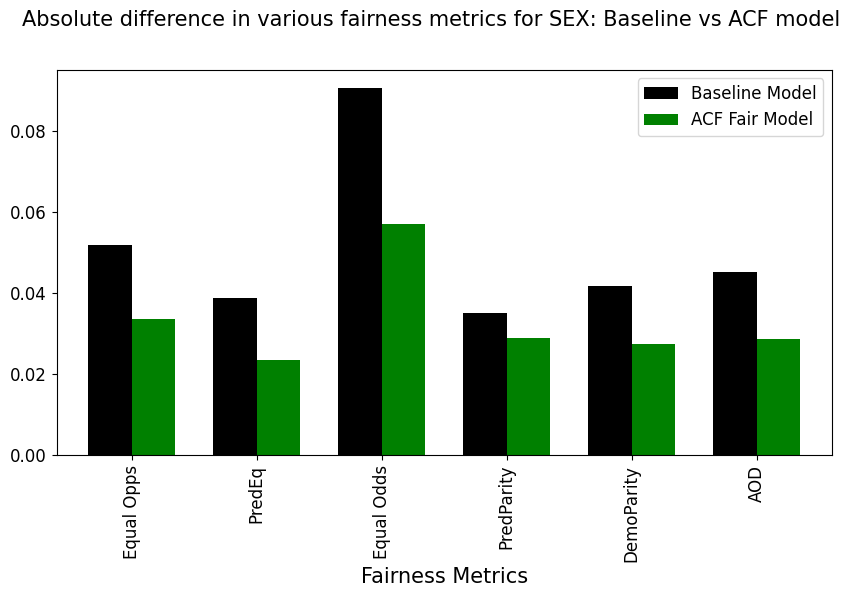

In [107]:
ax = ACF_table.plot.bar(x='Metrics', rot=90, width = 0.7, color=['black', 'green'], figsize=(10,5), fontsize=12)
plt.suptitle('Absolute difference in various fairness metrics for {}: Baseline vs ACF model'.format('SEX'),  
             fontsize=15, y=1)

patches, labels = ax.get_legend_handles_labels()
ax.legend(patches, labels, loc='upper right', fontsize=12)

ax.set_xlabel('Fairness Metrics', fontsize=15)
plt.show()

In [108]:
# for groupe in range(0, len(biased_protected_groups)):
#     choice = biased_protected_groups[groupe]
#     protected_group = list(adv_groups[groupe].keys())[0]
#     adv_protected_group_value = adv_groups[groupe][protected_group]
#     disadv_protected_group_value = disadv_groups[groupe][protected_group]
    
#     tn_disadv, fp_disadv, fn_disadv, tp_disadv = acf.confusion_mat(choice, disadv_protected_group_value)
#     tn_adv, fp_adv, fn_adv, tp_adv = acf.confusion_mat(choice, adv_protected_group_value)
    
#     acf_metrics = acf_fair_metrics(tn_disadv, fp_disadv, fn_disadv, tp_disadv, tn_adv, fp_adv, fn_adv, tp_adv)
#     logistic_reg_fair_metrics = fair_metrics(y_test, y_pred_prob, y_pred, X_test, choice, adv_protected_group_value, disadv_protected_group_value)
    
#     labels, log_reg_model = zip(*logistic_reg_fair_metrics)
#     headers, acf_model = zip(*acf_metrics)
#     ACF={'Fairness Metrics':headers[0:6], 
#              'Baseline Model':list(log_reg_model[2:8]), 'ACF Fair Model':list(acf_model[0:6])}
#     ACF_table=pd.DataFrame.from_dict(ACF) 
    
#     ax = ACF_table.plot.bar(x='Fairness Metrics', rot=90, width = 0.7, color=['black', 'green'], figsize=(10,5), fontsize=12)
#     plt.title(choice, fontsize=16)
# plt.show()

In [109]:
# sensitivity = ((df_dropped_sm['AGE'][df_dropped_sm['AGE'] >= 35]).max())/(len(df_dropped_sm)+1)
sensitivity = ((df_acf['LIMIT_BAL'][df_acf['LIMIT_BAL'] >= 167300]).max())/(len(df_acf)+1)
# sensitivity = 1
epsilon = 0.3

limit_bal_noise = [x + np.random.laplace(0, 1/epsilon) for x in df_acf['LIMIT_BAL']]
# noised = df_dropped_sm['AGE'] + np.random.laplace(loc=0, scale=sensitivity/epsilon)

In [110]:
df_acf['LIMIT_BAL'] = limit_bal_noise

In [111]:
df_acf

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,19999.135120,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120001.390479,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,89999.750763,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,49993.811049,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50001.034418,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,219999.271539,1,3,1,39,0,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29997,150003.171825,1,3,2,43,-1,-1,-1,-1,0,...,8979,5190,0,1837,3526,8998,129,0,0,0
29998,29996.340790,1,2,2,37,4,3,2,-1,0,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29999,80003.081947,1,3,1,41,1,-1,0,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [112]:
y=dataacf['default payment next month']
x=dataacf.drop(columns=['default payment next month'])
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=6666)

In [113]:
log_reg =  RandomForestClassifier(n_estimators = 100, random_state = 0).fit(X_train, y_train)

c:\Users\coola\AppData\Local\Programs\Python\Python310\lib\site-packages\diffprivlib\models\forest.py:190: PrivacyLeakWarning: Bounds have not been specified and will be calculated on the data provided. This will result in additional privacy leakage. To ensure differential privacy and no additional privacy leakage, specify bounds for each dimension.
  warnings.warn("Bounds have not been specified and will be calculated on the data provided. This will "
c:\Users\coola\AppData\Local\Programs\Python\Python310\lib\site-packages\diffprivlib\models\forest.py:209: PrivacyLeakWarning: Classes have not been specified and will be calculated on the data provided. This will result in additional privacy leakage. To ensure differential privacy and no additional privacy leakage, specify the prediction classes for model.
  warnings.warn("Classes have not been specified and will be calculated on the data provided. This will "


In [114]:
y_pred=log_reg.predict(X_test)
y_pred_prob=log_reg.predict_proba(X_test)[:,1]
print("Accuracy of the baseline model:", log_reg.score(X_test, y_test))

Accuracy of the baseline model: 0.7905


In [115]:
A_full=log_reg.score(X_test[X_test['SEX']==1], y_test[X_test['SEX']==1]) 
B_full=log_reg.score(X_test[X_test['SEX']==2], y_test[X_test['SEX']==2]) 
print("Accuracy difference between two groups:", abs(B_full-A_full)*100, "%")

Accuracy difference between two groups: 2.3353025540902794 %


## ACF

In [116]:
y=dataacf['default payment next month']
x=dataacf.drop(columns=['default payment next month'])
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=6666)

In [117]:
sens=X_train[biased_protected_groups]

In [118]:
# 'BILL_AMT1', 'BILL_AMT2',
#        'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6','PAY_AMT1',
#        'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']]

In [119]:
acf_limit_bal = LinearRegression().fit(sens, X_train['LIMIT_BAL'])
acf_ba1 = LinearRegression().fit(sens, X_train['BILL_AMT1'])
acf_ba2 = LinearRegression().fit(sens, X_train['BILL_AMT2'])
acf_ba3 = LinearRegression().fit(sens, X_train['BILL_AMT3'])
acf_ba4 = LinearRegression().fit(sens, X_train['BILL_AMT4'])
acf_ba5 = LinearRegression().fit(sens, X_train['BILL_AMT5'])
acf_ba6 = LinearRegression().fit(sens, X_train['BILL_AMT6'])
acf_pa1 = LinearRegression().fit(sens, X_train['PAY_AMT1'])
acf_pa2 = LinearRegression().fit(sens, X_train['PAY_AMT2'])
acf_pa3 = LinearRegression().fit(sens, X_train['PAY_AMT3'])
acf_pa4 = LinearRegression().fit(sens, X_train['PAY_AMT4'])
acf_pa5 = LinearRegression().fit(sens, X_train['PAY_AMT5'])
acf_pa6 = LinearRegression().fit(sens, X_train['PAY_AMT6'])

In [120]:
limitR = X_train['LIMIT_BAL'] - acf_limit_bal.predict(sens)
ba1R = X_train['BILL_AMT1'] - acf_ba1.predict(sens)
ba2R = X_train['BILL_AMT2'] - acf_ba2.predict(sens)
ba3R = X_train['BILL_AMT3'] - acf_ba3.predict(sens)
ba4R = X_train['BILL_AMT4'] - acf_ba4.predict(sens)
ba5R = X_train['BILL_AMT5'] - acf_ba5.predict(sens)
ba6R = X_train['BILL_AMT6'] - acf_ba6.predict(sens)
pa1R = X_train['PAY_AMT1'] - acf_pa1.predict(sens)
pa2R = X_train['PAY_AMT2'] - acf_pa2.predict(sens)
pa3R = X_train['PAY_AMT3'] - acf_pa3.predict(sens)
pa4R = X_train['PAY_AMT4'] - acf_pa4.predict(sens)
pa5R = X_train['PAY_AMT5'] - acf_pa5.predict(sens)
pa6R = X_train['PAY_AMT6'] - acf_pa6.predict(sens)

In [121]:
df_R=pd.DataFrame({'limitR':limitR,
                   'ba1R':ba1R,
                   'ba2R':ba2R,
                   'ba3R':ba3R,
                   'ba4R':ba4R,
                   'ba5R':ba5R,
                   'ba6R':ba6R,
                   'pa1R':pa1R,
                   'pa2R':pa2R,
                   'pa3R':pa3R,
                   'pa4R':pa4R,
                   'pa5R':pa5R,
                   'pa6R':pa6R,
                   })

In [122]:
#fitting residuals to the dependent (target) variable
fair =  RandomForestClassifier(n_estimators = 100, random_state = 0).fit(df_R, y_train)

c:\Users\coola\AppData\Local\Programs\Python\Python310\lib\site-packages\diffprivlib\models\forest.py:190: PrivacyLeakWarning: Bounds have not been specified and will be calculated on the data provided. This will result in additional privacy leakage. To ensure differential privacy and no additional privacy leakage, specify bounds for each dimension.
  warnings.warn("Bounds have not been specified and will be calculated on the data provided. This will "
c:\Users\coola\AppData\Local\Programs\Python\Python310\lib\site-packages\diffprivlib\models\forest.py:209: PrivacyLeakWarning: Classes have not been specified and will be calculated on the data provided. This will result in additional privacy leakage. To ensure differential privacy and no additional privacy leakage, specify the prediction classes for model.
  warnings.warn("Classes have not been specified and will be calculated on the data provided. This will "


In [123]:
sens=X_test[biased_protected_groups]

In [124]:
# acf_limit_bal = LinearRegression().fit(sens, X_test['LIMIT_BAL'])

acf_limit_bal = LinearRegression().fit(sens, X_test['LIMIT_BAL'])
acf_ba1 = LinearRegression().fit(sens, X_test['BILL_AMT1'])
acf_ba2 = LinearRegression().fit(sens, X_test['BILL_AMT2'])
acf_ba3 = LinearRegression().fit(sens, X_test['BILL_AMT3'])
acf_ba4 = LinearRegression().fit(sens, X_test['BILL_AMT4'])
acf_ba5 = LinearRegression().fit(sens, X_test['BILL_AMT5'])
acf_ba6 = LinearRegression().fit(sens, X_test['BILL_AMT6'])
acf_pa1 = LinearRegression().fit(sens, X_test['PAY_AMT1'])
acf_pa2 = LinearRegression().fit(sens, X_test['PAY_AMT2'])
acf_pa3 = LinearRegression().fit(sens, X_test['PAY_AMT3'])
acf_pa4 = LinearRegression().fit(sens, X_test['PAY_AMT4'])
acf_pa5 = LinearRegression().fit(sens, X_test['PAY_AMT5'])
acf_pa6 = LinearRegression().fit(sens, X_test['PAY_AMT6'])

In [125]:
# limitR = X_test['LIMIT_BAL'] - acf_limit_bal.predict(sens)

limitR = X_test['LIMIT_BAL'] - acf_limit_bal.predict(sens)
ba1R = X_test['BILL_AMT1'] - acf_ba1.predict(sens)
ba2R = X_test['BILL_AMT2'] - acf_ba2.predict(sens)
ba3R = X_test['BILL_AMT3'] - acf_ba3.predict(sens)
ba4R = X_test['BILL_AMT4'] - acf_ba4.predict(sens)
ba5R = X_test['BILL_AMT5'] - acf_ba5.predict(sens)
ba6R = X_test['BILL_AMT6'] - acf_ba6.predict(sens)
pa1R = X_test['PAY_AMT1'] - acf_pa1.predict(sens)
pa2R = X_test['PAY_AMT2'] - acf_pa2.predict(sens)
pa3R = X_test['PAY_AMT3'] - acf_pa3.predict(sens)
pa4R = X_test['PAY_AMT4'] - acf_pa4.predict(sens)
pa5R = X_test['PAY_AMT5'] - acf_pa5.predict(sens)
pa6R = X_test['PAY_AMT6'] - acf_pa6.predict(sens)

In [126]:
# df_R_test = pd.DataFrame({'limitR':limitR})

df_R_test = pd.DataFrame({'limitR':limitR,
                   'ba1R':ba1R,
                   'ba2R':ba2R,
                   'ba3R':ba3R,
                   'ba4R':ba4R,
                   'ba5R':ba5R,
                   'ba6R':ba6R,
                   'pa1R':pa1R,
                   'pa2R':pa2R,
                   'pa3R':pa3R,
                   'pa4R':pa4R,
                   'pa5R':pa5R,
                   'pa6R':pa6R,
                   })

In [127]:
y_pred_fair = fair.predict(df_R_test)
y_pred_prob_fair = fair.predict_proba(df_R_test)

In [128]:
print("Accuracy of the fair model:", fair.score(df_R_test, y_test))

Accuracy of the fair model: 0.7905


In [129]:
A_full=fair.score(df_R_test[sens['SEX']==1], y_test[sens['SEX']==1]) 
B_full=fair.score(df_R_test[sens['SEX']==2], y_test[sens['SEX']==2]) 
print("Accuracy difference between two groups:", abs(B_full-A_full)*100, "%")

Accuracy difference between two groups: 2.3353025540902794 %


In [130]:
tn_disadv, fp_disadv, fn_disadv, tp_disadv = confusion_matrix(y_test[sens['SEX']==1], y_pred_fair[sens['SEX']==1]).ravel()
tn_adv, fp_adv, fn_adv, tp_adv = confusion_matrix(y_test[sens['SEX']==2], y_pred_fair[sens['SEX']==2]).ravel()

acf_metrics = acf_fair_metrics(tn_disadv, fp_disadv, fn_disadv, tp_disadv, tn_adv, fp_adv, fn_adv, tp_adv)
acf_metrics

[('Equal Opps', 0.0),
 ('PredEq', 0.0),
 ('Equal Odds', 0.0),
 ('PredParity', 0.0),
 ('DemoParity', 0.0),
 ('AOD', 0.0),
 ('TEq', 1850000000000.0)]

In [131]:
print(tn_disadv, fp_disadv, fn_disadv, tp_disadv)
print(tn_adv, fp_adv, fn_adv, tp_adv)

1862 0 536 0
2881 0 721 0


In [132]:
logistic_reg_fair_metrics = fair_metrics(y_test, y_pred_prob, y_pred, X_test, 'SEX', 2, 1)
logistic_reg_fair_metrics

C:\Users\coola\AppData\Local\Temp\ipykernel_24108\239999809.py:83: RuntimeWarning: divide by zero encountered in longlong_scalars
  TE_adv = fn_adv/fp_adv
C:\Users\coola\AppData\Local\Temp\ipykernel_24108\239999809.py:84: RuntimeWarning: divide by zero encountered in longlong_scalars
  TE_disadv = fn_disadv/fp_disadv
C:\Users\coola\AppData\Local\Temp\ipykernel_24108\239999809.py:85: RuntimeWarning: invalid value encountered in double_scalars
  TE_diff = abs(TE_disadv - TE_adv)


[('AUC', 0.004338214169043231),
 ('Avg PrecScore', 0.016253758642129273),
 ('Equal Opps', 0.0),
 ('PredEq', 0.0),
 ('Equal Odds', 0.0),
 ('PredParity', 0.0),
 ('DemoParity', 0.0),
 ('AOD', 0.0),
 ('TEq', nan)]

In [133]:
labels, log_reg_model = zip(*logistic_reg_fair_metrics)
headers, acf_model = zip(*acf_metrics)
ACF={'Metrics':headers[0:6], 
             'Baseline Model':list(log_reg_model[2:8]), 'ACF Fair Model':list(acf_model[0:6])}
ACF_table=pd.DataFrame.from_dict(ACF)
ACF_table

,Metrics,Baseline Model,ACF Fair Model
0,Equal Opps,0.0,0.0
1,PredEq,0.0,0.0
2,Equal Odds,0.0,0.0
3,PredParity,0.0,0.0
4,DemoParity,0.0,0.0
5,AOD,0.0,0.0


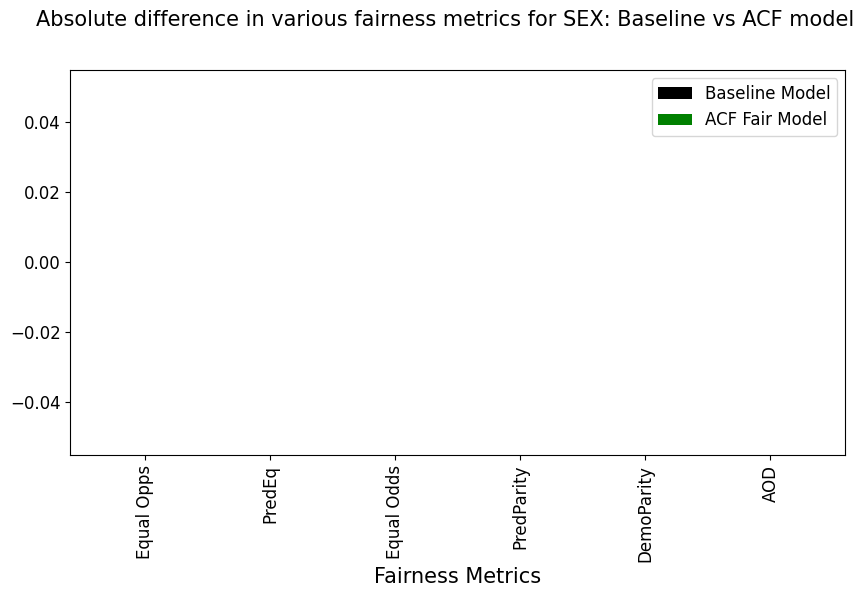

In [134]:
ax = ACF_table.plot.bar(x='Metrics', rot=90, width = 0.7, color=['black', 'green'], figsize=(10,5), fontsize=12)
plt.suptitle('Absolute difference in various fairness metrics for {}: Baseline vs ACF model'.format('SEX'),  
             fontsize=15, y=1)

patches, labels = ax.get_legend_handles_labels()
ax.legend(patches, labels, loc='upper right', fontsize=12)

ax.set_xlabel('Fairness Metrics', fontsize=15)
plt.show()

In [135]:
y=dataacf['default payment next month']
x=dataacf.drop(columns=['default payment next month'])
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=6666)

In [136]:
log_reg = LogisticRegression(random_state=0, solver='liblinear', multi_class='ovr').fit(X_train, y_train)

# log_reg = LogisticRegression().fit(X_train, y_train)

c:\Users\coola\AppData\Local\Programs\Python\Python310\lib\site-packages\diffprivlib\utils.py:71: DiffprivlibCompatibilityWarning: Parameter 'solver' is not functional in diffprivlib.  Remove this parameter to suppress this warning.
  warnings.warn(f"Parameter '{arg}' is not functional in diffprivlib.  Remove this parameter to suppress this "
c:\Users\coola\AppData\Local\Programs\Python\Python310\lib\site-packages\diffprivlib\utils.py:71: DiffprivlibCompatibilityWarning: Parameter 'multi_class' is not functional in diffprivlib.  Remove this parameter to suppress this warning.
  warnings.warn(f"Parameter '{arg}' is not functional in diffprivlib.  Remove this parameter to suppress this "
c:\Users\coola\AppData\Local\Programs\Python\Python310\lib\site-packages\diffprivlib\models\logistic_regression.py:239: PrivacyLeakWarning: Data norm has not been specified and will be calculated on the data provided.  This will result in additional privacy leakage. To ensure differential privacy and no 

In [137]:
y_pred=log_reg.predict(X_test)
y_pred_prob=log_reg.predict_proba(X_test)[:,1]
print("Accuracy of the baseline model:", log_reg.score(X_test, y_test))

Accuracy of the baseline model: 0.668


In [138]:
A_full=log_reg.score(X_test[X_test['SEX']==1], y_test[X_test['SEX']==1]) 
B_full=log_reg.score(X_test[X_test['SEX']==2], y_test[X_test['SEX']==2]) 
print("Accuracy difference between two groups:", abs(B_full-A_full)*100, "%")

Accuracy difference between two groups: 2.4912487224454494 %


##ACF

In [139]:
y=dataacf['default payment next month']
x=dataacf.drop(columns=['default payment next month'])
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=6666)

In [140]:
sens=X_train[biased_protected_groups]

In [141]:
acf_limit_bal = LinearRegression().fit(sens, X_train['LIMIT_BAL'])
acf_ba1 = LinearRegression().fit(sens, X_train['BILL_AMT1'])
acf_ba2 = LinearRegression().fit(sens, X_train['BILL_AMT2'])
acf_ba3 = LinearRegression().fit(sens, X_train['BILL_AMT3'])
acf_ba4 = LinearRegression().fit(sens, X_train['BILL_AMT4'])
acf_ba5 = LinearRegression().fit(sens, X_train['BILL_AMT5'])
acf_ba6 = LinearRegression().fit(sens, X_train['BILL_AMT6'])
acf_pa1 = LinearRegression().fit(sens, X_train['PAY_AMT1'])
acf_pa2 = LinearRegression().fit(sens, X_train['PAY_AMT2'])
acf_pa3 = LinearRegression().fit(sens, X_train['PAY_AMT3'])
acf_pa4 = LinearRegression().fit(sens, X_train['PAY_AMT4'])
acf_pa5 = LinearRegression().fit(sens, X_train['PAY_AMT5'])
acf_pa6 = LinearRegression().fit(sens, X_train['PAY_AMT6'])

In [142]:
limitR = (X_train['LIMIT_BAL'] - acf_limit_bal.predict(sens))**2
ba1R = (X_train['BILL_AMT1'] - acf_ba1.predict(sens))**2
ba2R = (X_train['BILL_AMT2'] - acf_ba2.predict(sens))**2
ba2R = (X_train['BILL_AMT2'] - acf_ba2.predict(sens))**2
ba3R = (X_train['BILL_AMT3'] - acf_ba3.predict(sens))**2
ba4R = (X_train['BILL_AMT4'] - acf_ba4.predict(sens))**2
ba5R = (X_train['BILL_AMT5'] - acf_ba5.predict(sens))**2
ba6R = (X_train['BILL_AMT6'] - acf_ba6.predict(sens))**2
pa1R = (X_train['PAY_AMT1'] - acf_pa1.predict(sens))**2
pa2R = (X_train['PAY_AMT2'] - acf_pa2.predict(sens))**2
pa3R = (X_train['PAY_AMT3'] - acf_pa3.predict(sens))**2
pa4R = (X_train['PAY_AMT4'] - acf_pa4.predict(sens))**2
pa5R = (X_train['PAY_AMT5'] - acf_pa5.predict(sens))**2
pa6R = (X_train['PAY_AMT6'] - acf_pa6.predict(sens))**2

In [143]:
df_R=pd.DataFrame({'limitR':limitR,
                   'ba1R':ba1R,
                   'ba2R':ba2R,
                   'ba3R':ba3R,
                   'ba4R':ba4R,
                   'ba5R':ba5R,
                   'ba6R':ba6R,
                   'pa1R':pa1R,
                   'pa2R':pa2R,
                   'pa3R':pa3R,
                   'pa4R':pa4R,
                   'pa5R':pa5R,
                   'pa6R':pa6R,
                   })

In [144]:
#fitting residuals to the dependent (target) variable
fair = LogisticRegression(random_state=0, solver='liblinear',
                              multi_class='ovr').fit(df_R, y_train)

c:\Users\coola\AppData\Local\Programs\Python\Python310\lib\site-packages\diffprivlib\utils.py:71: DiffprivlibCompatibilityWarning: Parameter 'solver' is not functional in diffprivlib.  Remove this parameter to suppress this warning.
  warnings.warn(f"Parameter '{arg}' is not functional in diffprivlib.  Remove this parameter to suppress this "
c:\Users\coola\AppData\Local\Programs\Python\Python310\lib\site-packages\diffprivlib\utils.py:71: DiffprivlibCompatibilityWarning: Parameter 'multi_class' is not functional in diffprivlib.  Remove this parameter to suppress this warning.
  warnings.warn(f"Parameter '{arg}' is not functional in diffprivlib.  Remove this parameter to suppress this "
c:\Users\coola\AppData\Local\Programs\Python\Python310\lib\site-packages\diffprivlib\models\logistic_regression.py:239: PrivacyLeakWarning: Data norm has not been specified and will be calculated on the data provided.  This will result in additional privacy leakage. To ensure differential privacy and no 

In [145]:
sens=X_test[biased_protected_groups]

In [146]:
acf_limit_bal = LinearRegression().fit(sens, X_test['LIMIT_BAL'])
acf_ba1 = LinearRegression().fit(sens, X_test['BILL_AMT1'])
acf_ba2 = LinearRegression().fit(sens, X_test['BILL_AMT2'])
acf_ba3 = LinearRegression().fit(sens, X_test['BILL_AMT3'])
acf_ba4 = LinearRegression().fit(sens, X_test['BILL_AMT4'])
acf_ba5 = LinearRegression().fit(sens, X_test['BILL_AMT5'])
acf_ba6 = LinearRegression().fit(sens, X_test['BILL_AMT6'])
acf_pa1 = LinearRegression().fit(sens, X_test['PAY_AMT1'])
acf_pa2 = LinearRegression().fit(sens, X_test['PAY_AMT2'])
acf_pa3 = LinearRegression().fit(sens, X_test['PAY_AMT3'])
acf_pa4 = LinearRegression().fit(sens, X_test['PAY_AMT4'])
acf_pa5 = LinearRegression().fit(sens, X_test['PAY_AMT5'])
acf_pa6 = LinearRegression().fit(sens, X_test['PAY_AMT6'])

In [147]:
limitR = (X_test['LIMIT_BAL'] - acf_limit_bal.predict(sens))**2
ba1R = (X_test['BILL_AMT1'] - acf_ba1.predict(sens))**2
ba2R = (X_test['BILL_AMT2'] - acf_ba2.predict(sens))**2
ba3R = (X_test['BILL_AMT3'] - acf_ba3.predict(sens))**2
ba4R = (X_test['BILL_AMT4'] - acf_ba4.predict(sens))**2
ba5R = (X_test['BILL_AMT5'] - acf_ba5.predict(sens))**2
ba6R = (X_test['BILL_AMT6'] - acf_ba6.predict(sens))**2
pa1R = (X_test['PAY_AMT1'] - acf_pa1.predict(sens))**2
pa2R = (X_test['PAY_AMT2'] - acf_pa2.predict(sens))**2
pa3R = (X_test['PAY_AMT3'] - acf_pa3.predict(sens))**2
pa4R = (X_test['PAY_AMT4'] - acf_pa4.predict(sens))**2
pa5R = (X_test['PAY_AMT5'] - acf_pa5.predict(sens))**2
pa6R = (X_test['PAY_AMT6'] - acf_pa6.predict(sens))**2

In [148]:
df_R_test = pd.DataFrame({'limitR':limitR,
                   'ba1R':ba1R,
                   'ba2R':ba2R,
                   'ba3R':ba3R,
                   'ba4R':ba4R,
                   'ba5R':ba5R,
                   'ba6R':ba6R,
                   'pa1R':pa1R,
                   'pa2R':pa2R,
                   'pa3R':pa3R,
                   'pa4R':pa4R,
                   'pa5R':pa5R,
                   'pa6R':pa6R,
                   })

In [149]:
y_pred_fair = fair.predict(df_R_test)
y_pred_prob_fair = fair.predict_proba(df_R_test)

In [150]:
print("Accuracy of the fair model:", fair.score(df_R_test, y_test))

Accuracy of the fair model: 0.7531666666666667


In [151]:
A_full=fair.score(df_R_test[sens['SEX']==1], y_test[sens['SEX']==1]) 
B_full=fair.score(df_R_test[sens['SEX']==2], y_test[sens['SEX']==2]) 
print("Accuracy difference between two groups:", abs(B_full-A_full)*100, "%")

Accuracy difference between two groups: 1.812564514478332 %


In [152]:
tn_disadv, fp_disadv, fn_disadv, tp_disadv = confusion_matrix(y_test[sens['SEX']==1], y_pred_fair[sens['SEX']==1]).ravel()
tn_adv, fp_adv, fn_adv, tp_adv = confusion_matrix(y_test[sens['SEX']==2], y_pred_fair[sens['SEX']==2]).ravel()

acf_metrics = acf_fair_metrics(tn_disadv, fp_disadv, fn_disadv, tp_disadv, tn_adv, fp_adv, fn_adv, tp_adv)
acf_metrics

[('Equal Opps', 0.007377295216014268),
 ('PredEq', 0.0015093890823652603),
 ('Equal Odds', 0.005867906133648987),
 ('PredParity', 0.04656862745090892),
 ('DemoParity', 7.87256083752963e-05),
 ('AOD', 0.00293395306682449),
 ('TEq', 0.6812854642818413)]

In [153]:
print(tn_disadv, fp_disadv, fn_disadv, tp_disadv)
print(tn_adv, fp_adv, fn_adv, tp_adv)

1753 109 509 27
2708 173 690 31


In [154]:
logistic_reg_fair_metrics = fair_metrics(y_test, y_pred_prob, y_pred, X_test, 'SEX', 2, 1)
logistic_reg_fair_metrics

[('AUC', 0.023683371010070176),
 ('Avg PrecScore', 0.0298731028950808),
 ('Equal Opps', 0.07199008425279974),
 ('PredEq', 0.03393785947488845),
 ('Equal Odds', 0.10592794372768827),
 ('PredParity', 0.0533936210092637),
 ('DemoParity', 0.041968853370775855),
 ('AOD', 0.05296397186384412),
 ('TEq', 0.11007602527037141)]

In [155]:
labels, log_reg_model = zip(*logistic_reg_fair_metrics)
headers, acf_model = zip(*acf_metrics)
ACF={'Metrics':headers[0:6], 
             'Baseline Model':list(log_reg_model[2:8]), 'ACF Fair Model':list(acf_model[0:6])}
ACF_table=pd.DataFrame.from_dict(ACF)
ACF_table

,Metrics,Baseline Model,ACF Fair Model
0,Equal Opps,0.071990,0.007377
1,PredEq,0.033938,0.001509
2,Equal Odds,0.105928,0.005868
3,PredParity,0.053394,0.046569
4,DemoParity,0.041969,0.000079
5,AOD,0.052964,0.002934


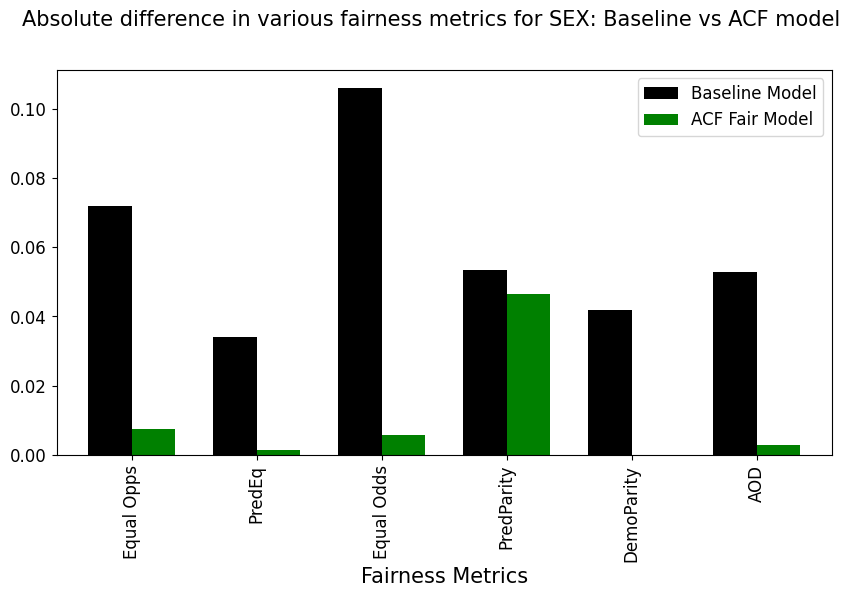

In [156]:
ax = ACF_table.plot.bar(x='Metrics', rot=90, width = 0.7, color=['black', 'green'], figsize=(10,5), fontsize=12)
plt.suptitle('Absolute difference in various fairness metrics for {}: Baseline vs ACF model'.format('SEX'),  
             fontsize=15, y=1)

patches, labels = ax.get_legend_handles_labels()
ax.legend(patches, labels, loc='upper right', fontsize=12)

ax.set_xlabel('Fairness Metrics', fontsize=15)
plt.show()

Adding Noise

In [157]:
# sensitivity = ((df_dropped_sm['AGE'][df_dropped_sm['AGE'] >= 35]).max())/(len(df_dropped_sm)+1)
sensitivity = ((df_acf['LIMIT_BAL'][df_acf['LIMIT_BAL'] >= 167300]).max())/(len(df_acf)+1)
# sensitivity = 1
epsilon = 0.3

limit_bal_noise = [x + np.random.laplace(0, 1/epsilon) for x in df_acf['LIMIT_BAL']]
# noised = df_dropped_sm['AGE'] + np.random.laplace(loc=0, scale=sensitivity/epsilon)

In [158]:
y=dataacf['default payment next month']
x=dataacf.drop(columns=['default payment next month'])
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=6666)

In [159]:
log_reg =  RandomForestClassifier(n_estimators = 100, random_state = 0).fit(X_train, y_train)

c:\Users\coola\AppData\Local\Programs\Python\Python310\lib\site-packages\diffprivlib\models\forest.py:190: PrivacyLeakWarning: Bounds have not been specified and will be calculated on the data provided. This will result in additional privacy leakage. To ensure differential privacy and no additional privacy leakage, specify bounds for each dimension.
  warnings.warn("Bounds have not been specified and will be calculated on the data provided. This will "
c:\Users\coola\AppData\Local\Programs\Python\Python310\lib\site-packages\diffprivlib\models\forest.py:209: PrivacyLeakWarning: Classes have not been specified and will be calculated on the data provided. This will result in additional privacy leakage. To ensure differential privacy and no additional privacy leakage, specify the prediction classes for model.
  warnings.warn("Classes have not been specified and will be calculated on the data provided. This will "


In [160]:
y_pred=log_reg.predict(X_test)
y_pred_prob=log_reg.predict_proba(X_test)[:,1]
print("Accuracy of the baseline model:", log_reg.score(X_test, y_test))

Accuracy of the baseline model: 0.7905


In [161]:
A_full=log_reg.score(X_test[X_test['SEX']==1], y_test[X_test['SEX']==1]) 
B_full=log_reg.score(X_test[X_test['SEX']==2], y_test[X_test['SEX']==2]) 
print("Accuracy difference between two groups:", abs(B_full-A_full)*100, "%")

Accuracy difference between two groups: 2.3353025540902794 %


In [162]:
from sklearn.ensemble import RandomForestClassifier

In [163]:
y=dataacf['default payment next month']
x=dataacf.drop(columns=['default payment next month'])
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=6666)

In [164]:
sens=X_train[biased_protected_groups]

In [165]:
acf_limit_bal = LinearRegression().fit(sens, X_train['LIMIT_BAL'])
acf_ba1 = LinearRegression().fit(sens, X_train['BILL_AMT1'])
acf_ba2 = LinearRegression().fit(sens, X_train['BILL_AMT2'])
acf_ba3 = LinearRegression().fit(sens, X_train['BILL_AMT3'])
acf_ba4 = LinearRegression().fit(sens, X_train['BILL_AMT4'])
acf_ba5 = LinearRegression().fit(sens, X_train['BILL_AMT5'])
acf_ba6 = LinearRegression().fit(sens, X_train['BILL_AMT6'])
acf_pa1 = LinearRegression().fit(sens, X_train['PAY_AMT1'])
acf_pa2 = LinearRegression().fit(sens, X_train['PAY_AMT2'])
acf_pa3 = LinearRegression().fit(sens, X_train['PAY_AMT3'])
acf_pa4 = LinearRegression().fit(sens, X_train['PAY_AMT4'])
acf_pa5 = LinearRegression().fit(sens, X_train['PAY_AMT5'])
acf_pa6 = LinearRegression().fit(sens, X_train['PAY_AMT6'])

In [166]:
limitR = (X_train['LIMIT_BAL'] - acf_limit_bal.predict(sens))**2
ba1R = (X_train['BILL_AMT1'] - acf_ba1.predict(sens))**2
ba2R = (X_train['BILL_AMT2'] - acf_ba2.predict(sens))**2
ba3R = (X_train['BILL_AMT3'] - acf_ba3.predict(sens))**2
ba4R = (X_train['BILL_AMT4'] - acf_ba4.predict(sens))**2
ba5R = (X_train['BILL_AMT5'] - acf_ba5.predict(sens))**2
ba6R = (X_train['BILL_AMT6'] - acf_ba6.predict(sens))**2
pa1R = (X_train['PAY_AMT1'] - acf_pa1.predict(sens))**2
pa2R = (X_train['PAY_AMT2'] - acf_pa2.predict(sens))**2
pa3R = (X_train['PAY_AMT3'] - acf_pa3.predict(sens))**2
pa4R = (X_train['PAY_AMT4'] - acf_pa4.predict(sens))**2
pa5R = (X_train['PAY_AMT5'] - acf_pa5.predict(sens))**2
pa6R = (X_train['PAY_AMT6'] - acf_pa6.predict(sens))**2

In [167]:
df_R=pd.DataFrame({'limitR':limitR,
                   'ba1R':ba1R,
                   'ba2R':ba2R,
                   'ba3R':ba3R,
                   'ba4R':ba4R,
                   'ba5R':ba5R,
                   'ba6R':ba6R,
                   'pa1R':pa1R,
                   'pa2R':pa2R,
                   'pa3R':pa3R,
                   'pa4R':pa4R,
                   'pa5R':pa5R,
                   'pa6R':pa6R,
                   })

In [168]:
#fitting residuals to the dependent (target) variable
fair =  RandomForestClassifier(n_estimators = 100, random_state = 0).fit(df_R, y_train)

In [169]:
sens=X_test[biased_protected_groups]

In [170]:
acf_limit_bal = LinearRegression().fit(sens, X_test['LIMIT_BAL'])
acf_ba1 = LinearRegression().fit(sens, X_test['BILL_AMT1'])
acf_ba2 = LinearRegression().fit(sens, X_test['BILL_AMT2'])
acf_ba3 = LinearRegression().fit(sens, X_test['BILL_AMT3'])
acf_ba4 = LinearRegression().fit(sens, X_test['BILL_AMT4'])
acf_ba5 = LinearRegression().fit(sens, X_test['BILL_AMT5'])
acf_ba6 = LinearRegression().fit(sens, X_test['BILL_AMT6'])
acf_pa1 = LinearRegression().fit(sens, X_test['PAY_AMT1'])
acf_pa2 = LinearRegression().fit(sens, X_test['PAY_AMT2'])
acf_pa3 = LinearRegression().fit(sens, X_test['PAY_AMT3'])
acf_pa4 = LinearRegression().fit(sens, X_test['PAY_AMT4'])
acf_pa5 = LinearRegression().fit(sens, X_test['PAY_AMT5'])
acf_pa6 = LinearRegression().fit(sens, X_test['PAY_AMT6'])

In [171]:
limitR = (X_test['LIMIT_BAL'] - acf_limit_bal.predict(sens))**2
ba1R = (X_test['BILL_AMT1'] - acf_ba1.predict(sens))**2
ba2R = (X_test['BILL_AMT2'] - acf_ba2.predict(sens))**2
ba3R = (X_test['BILL_AMT3'] - acf_ba3.predict(sens))**2
ba4R = (X_test['BILL_AMT4'] - acf_ba4.predict(sens))**2
ba5R = (X_test['BILL_AMT5'] - acf_ba5.predict(sens))**2
ba6R = (X_test['BILL_AMT6'] - acf_ba6.predict(sens))**2
pa1R = (X_test['PAY_AMT1'] - acf_pa1.predict(sens))**2
pa2R = (X_test['PAY_AMT2'] - acf_pa2.predict(sens))**2
pa3R = (X_test['PAY_AMT3'] - acf_pa3.predict(sens))**2
pa4R = (X_test['PAY_AMT4'] - acf_pa4.predict(sens))**2
pa5R = (X_test['PAY_AMT5'] - acf_pa5.predict(sens))**2
pa6R = (X_test['PAY_AMT6'] - acf_pa6.predict(sens))**2

In [172]:
df_R_test = pd.DataFrame({'limitR':limitR,
                   'ba1R':ba1R,
                   'ba2R':ba2R,
                   'ba3R':ba3R,
                   'ba4R':ba4R,
                   'ba5R':ba5R,
                   'ba6R':ba6R,
                   'pa1R':pa1R,
                   'pa2R':pa2R,
                   'pa3R':pa3R,
                   'pa4R':pa4R,
                   'pa5R':pa5R,
                   'pa6R':pa6R,
                   })

In [173]:
y_pred_fair = fair.predict(df_R_test)
y_pred_prob_fair = fair.predict_proba(df_R_test)

In [174]:
print("Accuracy of the fair model:", fair.score(df_R_test, y_test))

Accuracy of the fair model: 0.7871666666666667


In [175]:
A_full=fair.score(df_R_test[sens['SEX']==1], y_test[sens['SEX']==1]) 
B_full=fair.score(df_R_test[sens['SEX']==2], y_test[sens['SEX']==2]) 
print("Accuracy difference between two groups:", abs(B_full-A_full)*100, "%")

Accuracy difference between two groups: 2.8220120505751733 %


In [176]:
tn_disadv, fp_disadv, fn_disadv, tp_disadv = confusion_matrix(y_test[sens['SEX']==1], y_pred_fair[sens['SEX']==1]).ravel()
tn_adv, fp_adv, fn_adv, tp_adv = confusion_matrix(y_test[sens['SEX']==2], y_pred_fair[sens['SEX']==2]).ravel()

acf_metrics = acf_fair_metrics(tn_disadv, fp_disadv, fn_disadv, tp_disadv, tn_adv, fp_adv, fn_adv, tp_adv)
acf_metrics

[('Equal Opps', 0.005708282443538271),
 ('PredEq', 0.010414728744308332),
 ('Equal Odds', 0.016123011187846537),
 ('PredParity', 0.057165057165036504),
 ('DemoParity', 0.010463559536704425),
 ('AOD', 0.008061505593923267),
 ('TEq', 3.565312046436926)]

In [177]:
print(tn_disadv, fp_disadv, fn_disadv, tp_disadv)
print(tn_adv, fp_adv, fn_adv, tp_adv)

1809 53 498 38
2829 52 674 47


In [178]:
logistic_reg_fair_metrics = fair_metrics(y_test, y_pred_prob, y_pred, X_test, 'SEX', 2, 1)
logistic_reg_fair_metrics

C:\Users\coola\AppData\Local\Temp\ipykernel_24108\239999809.py:83: RuntimeWarning: divide by zero encountered in longlong_scalars
  TE_adv = fn_adv/fp_adv
C:\Users\coola\AppData\Local\Temp\ipykernel_24108\239999809.py:84: RuntimeWarning: divide by zero encountered in longlong_scalars
  TE_disadv = fn_disadv/fp_disadv
C:\Users\coola\AppData\Local\Temp\ipykernel_24108\239999809.py:85: RuntimeWarning: invalid value encountered in double_scalars
  TE_diff = abs(TE_disadv - TE_adv)


[('AUC', 0.004338214169043231),
 ('Avg PrecScore', 0.016253758642129273),
 ('Equal Opps', 0.0),
 ('PredEq', 0.0),
 ('Equal Odds', 0.0),
 ('PredParity', 0.0),
 ('DemoParity', 0.0),
 ('AOD', 0.0),
 ('TEq', nan)]

In [179]:
labels, log_reg_model = zip(*logistic_reg_fair_metrics)
headers, acf_model = zip(*acf_metrics)
ACF={'Metrics':headers[0:6], 
             'Baseline Model':list(log_reg_model[2:8]), 'ACF Fair Model':list(acf_model[0:6])}
ACF_table=pd.DataFrame.from_dict(ACF)
ACF_table

,Metrics,Baseline Model,ACF Fair Model
0,Equal Opps,0.0,0.005708
1,PredEq,0.0,0.010415
2,Equal Odds,0.0,0.016123
3,PredParity,0.0,0.057165
4,DemoParity,0.0,0.010464
5,AOD,0.0,0.008062


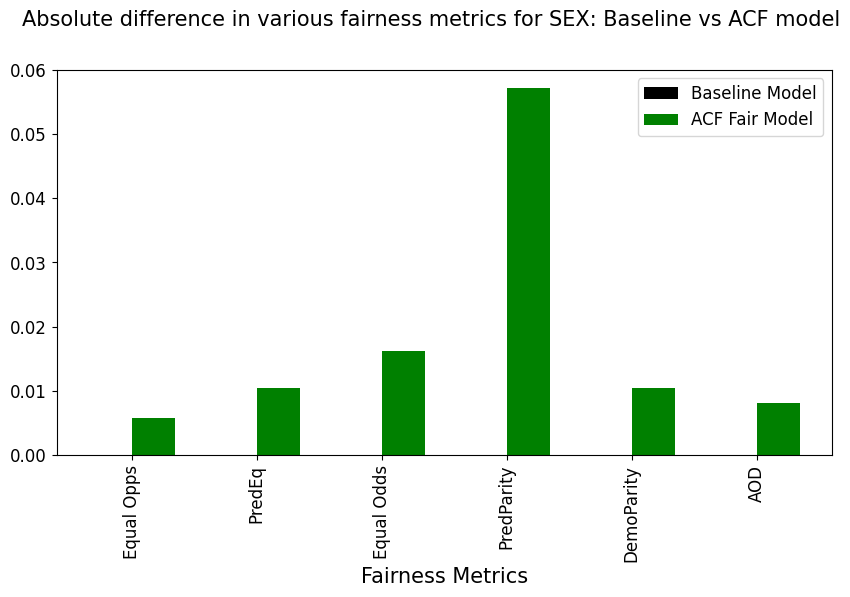

In [180]:
ax = ACF_table.plot.bar(x='Metrics', rot=90, width = 0.7, color=['black', 'green'], figsize=(10,5), fontsize=12)
plt.suptitle('Absolute difference in various fairness metrics for {}: Baseline vs ACF model'.format('SEX'),  
             fontsize=15, y=1)

patches, labels = ax.get_legend_handles_labels()
ax.legend(patches, labels, loc='upper right', fontsize=12)

ax.set_xlabel('Fairness Metrics', fontsize=15)
plt.show()

# DF for XAI

In [181]:
class clf_dummy():
    def predict(X_train):
        return(clf.predict_proba(X_train)[:, 1])

In [182]:
feat_eff = ale(X=X_train, model=clf_dummy, feature=['LIMIT_BAL'], grid_size=10)

NameError: name 'ale' is not defined

In [ ]:
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X_train, y_train)
data_stats = X_test.describe(include='all')  # take the describtion of dataset
data_stats1 = data_stats.drop(['count','std'])   # drop the column which u don't require

In [ ]:
data_stats1

In [ ]:
col_val = ['LIMIT_BAL']

In [ ]:
def get_data(d):
    return d[:, 0]

In [ ]:
my_model = RandomForestClassifier(n_estimators=30, random_state=1).fit(X_train, y_train)
import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(my_model, random_state=1).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = X_test.columns.tolist())

In [ ]:
import shap
from sklearn.linear_model import LogisticRegression

In [ ]:
from shap import *

In [ ]:
rf_prob_1 = lambda x: clf.predict_proba(x)[:,1]

In [ ]:
clf = RandomForestClassifier(max_depth=2, random_state=0)
# clf = LogisticRegression()
clf.fit(X_train, y_train)

In [ ]:
explainer = shap.TreeExplainer(clf)
shap_values = shap.TreeExplainer(clf).shap_values(X_train)
shap.summary_plot(shap_values, X_train, plot_type="bar")

In [ ]:
explainer = shap.TreeExplainer(clf)
shap_values = shap.TreeExplainer(clf).shap_values(X_train)

shap.summary_plot(shap_values[1], X_train)

In [ ]:
shap.summary_plot(shap_values[0], X_train)

In [ ]:
shap.dependence_plot("LIMIT_BAL", shap_values[1], X_train, interaction_index=None)

In [ ]:
shap.dependence_plot('LIMIT_BAL', shap_values[1], X_train)

In [ ]:
inds = shap.approximate_interactions("LIMIT_BAL", shap_values[1], X_train)

for i in range(5):
    shap.dependence_plot("LIMIT_BAL", shap_values[1], X_train, interaction_index=inds[i])

In [ ]:
j=pd.DataFrame(f_imp[:20])
p=j['index'].to_list()

In [ ]:
y_train[:100,].shape

In [ ]:
clf2 = RandomForestClassifier().fit(X_train.loc[:100,p], y_train.loc[:100,])

In [ ]:
row_to_show = 5
data_for_prediction = X_test.iloc[row_to_show]  
data_for_prediction_array = data_for_prediction.values.reshape(1, -1)
clf.predict_proba(data_for_prediction_array)

In [ ]:
explainer = shap.TreeExplainer(clf)
# Calculate Shap values
shap_values = explainer.shap_values(data_for_prediction)

In [ ]:
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1], data_for_prediction)

In [ ]:
explainer.expected_value

In [ ]:
shap.decision_plot(explainer.expected_value[1], shap_values[1], X_train.columns)

In [ ]:
shap.decision_plot(explainer.expected_value[1], shap_values[1], X_train.columns, feature_order='hclust')

In [ ]:
explainer = shap.explainers.Permutation(clf.predict_proba, X_test)
shap_values = explainer(X_test[:100])

In [ ]:
# get just the explanations for the positive class
shap_values2 = shap_values[...,0]
shap_values3 = shap_values[...,1]

In [ ]:
shap.plots.waterfall(shap_values2[19]) #5, 19, 81, 

In [ ]:
shap.plots.waterfall(shap_values3[19]) #5, 19, 81, 

In [ ]:
import interpret
from interpret.glassbox import *
from interpret.glassbox import ExplainableBoostingClassifier

In [ ]:
ebm = ExplainableBoostingClassifier()
ebm.fit(X_train, y_train)

In [ ]:
from interpret import show

In [ ]:
from markupsafe import escape
ebm_global = ebm.explain_global(name='EBM')
show(ebm_global)

In [ ]:
ebm_local = ebm.explain_local(X_test[:5], y_test[:5], name='EBM')
show(ebm_local)

In [ ]:
from interpret.perf import ROC

ebm_perf = ROC(ebm.predict_proba).explain_perf(X_test, y_test, name='EBM')
show(ebm_perf)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

pca = PCA()
rf = RandomForestClassifier()

blackbox_model = rf #Pipeline([('pca', pca), ('rf', rf)])
blackbox_model.fit(X_train, y_train)

In [ ]:
from interpret import show
from interpret.perf import ROC

blackbox_perf = ROC(blackbox_model.predict_proba).explain_perf(X_test, y_test, name='Blackbox')
show(blackbox_perf)


In [ ]:
from interpret.blackbox import LimeTabular
from interpret import show

#Blackbox explainers need a predict function, and optionally a dataset
lime = LimeTabular(predict_fn=blackbox_model.predict_proba, data=X_train, random_state=1)

#Pick the instances to explain, optionally pass in labels if you have them
lime_local = lime.explain_local(X_test[:5], y_test[:5], name='LIME')

show(lime_local)


In [ ]:
from interpret.blackbox import ShapKernel
import numpy as np
feature_names = list(X_test.columns)


background_val = np.median(X_train, axis=0).reshape(1, -1)
shap = ShapKernel(predict_fn=blackbox_model.predict_proba, data=background_val, feature_names=feature_names)
shap_local = shap.explain_local(X_test[:5], y_test[:5], name='SHAP')
show(shap_local)

In [ ]:
from interpret.blackbox import MorrisSensitivity



sensitivity = MorrisSensitivity(predict_fn=blackbox_model.predict_proba, data=X_train)
sensitivity_global = sensitivity.explain_global(name="Global Sensitivity")

show(sensitivity_global)

In [ ]:
sensitivity_global.selector

In [ ]:
from interpret.blackbox import PartialDependence

pdp = PartialDependence(predict_fn=blackbox_model.predict_proba, data=X_train)
pdp_global = pdp.explain_global(name='Partial Dependence')

show(pdp_global)

In [ ]:
show([blackbox_perf, lime_local, shap_local, sensitivity_global, pdp_global])

In [ ]:
import pygam
from pygam import LinearGAM, s, f
from pygam import LogisticGAM

In [ ]:
j=pd.DataFrame(f_imp[:20])
p=j['index'].to_list()

In [ ]:
#gam = LogisticGAM().fit(X_train, y_train)
gam = LogisticGAM().fit(X_train.loc[:,p], y_train)

In [ ]:
gam.accuracy(X_train.loc[:,p], y_train)

In [ ]:
gam.accuracy(X_test.loc[:,p], y_test)

In [ ]:
gam.summary()

In [ ]:
titles=X_train.columns.to_list()

for i, term in enumerate(gam.terms):
    if term.isintercept:
        continue
    XX = gam.generate_X_grid(term=i)
    pdep, confi = gam.partial_dependence(term=i, X=XX, width=0.95)
    plt.figure()
    plt.rcParams['figure.figsize'] = (10, 6)

    plt.plot(XX[:, term.feature], pdep)
    plt.plot(XX[:, term.feature], confi, c='r', ls='--')
    plt.title(repr(titles[i]))
    plt.show()

In [ ]:
X_train.loc[:,p].columns

In [ ]:
clf2 = RandomForestClassifier(random_state=66).fit(X_train.loc[:,p], y_train)

In [ ]:
from ceml.sklearn import generate_counterfactual

In [ ]:
x = X_test.loc[1,p]
print("Prediction on x: {0}".format(clf2.predict([x])))

In [ ]:
x.values

In [ ]:
 # Compute counterfactual
print("\nCompute counterfactual ....")
print(generate_counterfactual(clf2, x.values, y_target=0, features_whitelist=None))

In [ ]:
print(generate_counterfactual(clf2, x.values, y_target=1, features_whitelist=None))

In [ ]:
# Feature 1
original_value = 1.00000000e+00
CF_value = 1.00000141e+00
print ('Delta: ', original_value-CF_value)

In [ ]:
# Feature 2
original_value = 1.00000000e+00
CF_value = 9.99985689e-01
print ('Delta: ', original_value-CF_value)

In [ ]:
# Feature 8
original_value = 4.29111556e-01
CF_value = 3.87700951e-01
print ('Delta: ', original_value-CF_value)

In [ ]:
x.values.shape

In [ ]:
test_list = [11, 11, 27, 30, 30, 30, 36, 40, 11, 53 ]

In [ ]:
pd.qcut(test_list, 5, duplicates='drop').value_counts()

In [ ]:
score = pd.DataFrame(clf2.predict_proba(X_test.loc[:,p])[:,0])
ytest = pd.DataFrame(y_test)
ytest = ytest.reset_index(drop=True)
view = pd.concat([ytest, score], axis=1)
view.columns = ['Default', 'Score']
view['Score2']=view['Score']*100

In [ ]:
def ret_tag(val):
    for i in range(10):
        if val in categories[i]:
            return tags[i]
        
def zero_list_maker(n):
    list_of_zeros = [0] * n
    return list_of_zeros

In [ ]:
i=5
cuts_by_quantile = pd.qcut(view['Score2'], 11, duplicates='drop') #11, duplicates='drop'

toplt = cuts_by_quantile.value_counts().index.categories.mid
categories = cuts_by_quantile.value_counts().index.categories
left_bounds = categories.left
right_bounds = categories.right
tags = range(1, 11)

In [ ]:
cuts_by_quantile.value_counts()#/len(view['Score2'])

In [ ]:
def bar_width_per_quantile(view, label_filter):
    view_filtered = view[view['Default'] == label_filter]
    view_filtered['tag'] = view_filtered['Score2'].map(lambda x: ret_tag(x))
    len_view_filtered = len(view_filtered)
    view_filtered['ID']=view_filtered.index
    count_pertag_filtered = view_filtered[['ID', 'tag']].groupby(['tag']).count().rename(columns={'ID': 'Count'})
    count_pertag_filtered['perc'] = count_pertag_filtered['Count'] / len_view_filtered * 100
    sc = count_pertag_filtered['perc'].tolist()
    sc = zero_list_maker(10 - len(sc)) + sc #10
    return sc

In [ ]:
def bar_width_per_quantile2(view, label_filter):
    view_filtered = view[view['Default'] == label_filter]
    view_filtered['tag'] = view_filtered['Score2'].map(lambda x: ret_tag(x))
    len_view_filtered = len(view_filtered)
    view_filtered['ID']=view_filtered.index
    count_pertag_filtered = view_filtered[['ID', 'tag']].groupby(['tag']).count().rename(columns={'ID': 'Count'})
    count_pertag_filtered['perc'] = count_pertag_filtered['Count'] / len(view) * 100
    sc = count_pertag_filtered['perc'].tolist()
    sc = zero_list_maker(10 - len(sc)) + sc #10
    return sc

In [ ]:
sc1 = bar_width_per_quantile(view, 1)
sc0 = bar_width_per_quantile(view, 0)

In [ ]:
sc1 = bar_width_per_quantile2(view, 1)
sc0 = bar_width_per_quantile2(view, 0)

In [ ]:
name = [str(left_bounds[i])+'-'+str(right_bounds[i]) for i in range(10)] #10

In [ ]:
data_p = [(name[i], sc1[i], sc0[i]) for i in range(10)] #10

In [ ]:
df = pd.DataFrame(columns=["Range","Label: 1", "Label 0"], data=data_p)

In [ ]:
pal = sns.color_palette("RdYlBu", len(df['Range']))

In [ ]:
sns.set_style()
sns.set_style("dark")

plt.rcParams["figure.figsize"] = (20,10)

ax=df.set_index('Range').T.plot.bar(stacked=True, color = pal, grid=True)

plt.title("Label vs Score Splits Comparison")

for rect in ax.patches:
    height = rect.get_height()
    width = rect.get_width()
    x = rect.get_x()
    y = rect.get_y()
    
    label_text = f'{height:.2f}'  
    
    label_x = x + width / 2
    label_y = (y + height / 2)

    ax.text(label_x, label_y, label_text, ha='center', va='center', fontsize=12)
    
ax.legend(loc='upper right')    
ax.set_ylabel("Total %age by Label", fontsize=18)
ax.set_xlabel("Tag", fontsize=20)
plt.show()

In [ ]:
sns.set_style()
sns.set_style("dark")

plt.rcParams["figure.figsize"] = (20,10)

ax=df.set_index('Range').T.plot.bar(stacked=True, color = pal, grid=True)

plt.title("Label vs Score Splits Comparison")

for rect in ax.patches:
    height = rect.get_height()
    width = rect.get_width()
    x = rect.get_x()
    y = rect.get_y()
    
    label_text = f'{height:.2f}'  
    
    label_x = x + width / 2
    label_y = (y + height / 2)

    ax.text(label_x, label_y, label_text, ha='center', va='center', fontsize=12)
    
ax.legend(loc='upper right')    
ax.set_ylabel("Total %age by Label", fontsize=18)
ax.set_xlabel("Tag", fontsize=20)
plt.show()

In [ ]:
#fig = plt.figure() # Create matplotlib figure

#plt.rcParams["figure.figsize"] = (10,5)
#plt.subplot(1, 2, 1)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))



margin = 0.05
width = (1.-2.*margin)/2
chart = df.set_index('Range').drop(columns=['Label: 1'])
chart2 = df.set_index('Range').drop(columns=['Label 0'])



chart.T.plot.bar(stacked=True, color = pal, grid=True, ax=ax1, width=width, legend=False)
for rect in ax1.patches:
    height = rect.get_height()
    width = rect.get_width()
    x = rect.get_x()
    y = rect.get_y()
    
    label_text = f'{height:.2f}'  
    
    label_x = x + width/2
    label_y = (y + height/2)

    ax1.text(label_x, label_y, label_text, ha='center', va='center', fontsize=12)


chart2.T.plot.bar(stacked=True, color = pal, grid=True, ax=ax2, width=width, legend=False)
for rect in ax2.patches:
    height = rect.get_height()
    width = rect.get_width()
    x = rect.get_x()
    y = rect.get_y()
    
    label_text = f'{height:.2f}'  
    
    label_x = x + width/2
    label_y = (y + height/2)

    ax2.text(label_x, label_y, label_text, ha='center', va='center', fontsize=12)

#ax1.legend(patches, labels, loc='upper left', fontsize=10)
#ax2.legend(patches, labels, loc='upper right', fontsize=14)




    

plt.tight_layout()  # otherwise the right y-label is slightly clipped
plt.legend()
plt.show()

In [ ]:
sc1 = bar_width_per_quantile(view, 1)
sc0 = bar_width_per_quantile(view, 0)

In [ ]:
name = [str(left_bounds[i])+'-'+str(right_bounds[i]) for i in range(10)] #10

In [ ]:
data_p = [(name[i], sc1[i], sc0[i]) for i in range(10)] #10

In [ ]:
df = pd.DataFrame(columns=["Range","Label: 1", "Label 0"], 
                  data=data_p)

In [ ]:
pal = sns.color_palette("RdYlBu", len(df['Range']))

In [ ]:
sns.set_style()
sns.set_style("dark")

plt.rcParams["figure.figsize"] = (20,10)

ax=df.set_index('Range').T.plot.bar(stacked=True, color = pal, grid=True)

plt.title("Label vs Score Splits Comparison")

for rect in ax.patches:
    height = rect.get_height()
    width = rect.get_width()
    x = rect.get_x()
    y = rect.get_y()
    
    label_text = f'{height:.2f}'  
    
    label_x = x + width / 2
    label_y = (y + height / 2)

    ax.text(label_x, label_y, label_text, ha='center', va='center', fontsize=12)
    
ax.legend(loc='upper right')    
ax.set_ylabel("Total %age by Label", fontsize=18)
ax.set_xlabel("Tag", fontsize=20)
plt.show()

In [ ]:
from collections import OrderedDict
from multiprocessing import cpu_count, Pool
import numpy as np

_N_CORES = cpu_count() - 1


class _SAResult:
    """ Storage for Sensitivity Analysis results"""
    def __init__(self):
        self._ts = OrderedDict()

    def add(self, value, df):
        """ Add returned probabilities for a given value 

        Args:
            value (:obj:`number`) 
                Value of the feature the predictions were made on
            df (:obj:`iterable`) 
                Probabilities
        """
        self._ts[value] = df

    def __iter__(self):
        return (v for v in self._ts.items())


class Analyser:
    """ Perform sensitivity analysis on any model in sklearn

    Args:
        model (:obj:`sklearn.Model`) 
            The model object
        df (:obj:`pandas.DataFrame`)
            Result of running DataFrame.describe() on the target dataset.
            The 'std' row should be dropped before running.
        predict (:obj:`function|method`)
            Function for running the prediction on. Example: model.predict
        get_result (:obj:`function|method`)
            Function for filtering the raw results as returned by the model
            upon running predict.
    """
    def __init__(self, model, df, predict, get_result):
        self._model = model
        self._df = df
        self._predict = predict
        self._get_result = get_result

    def run_on_features(self, features, steps=100, multicore=True):
        """ Run sensitivity analysis on a set of features.
        
        Args:
            features (:obj:`iterable`)
                Features to analyse. All values should be strings.
            steps (:obj:`int`, :optional)
                Number of data points between min and max to predict on. Default is 100.
            multicore (:obj:`bool`, :optional)
                Set this to False to run the predictions on a single process.

        Returns:
            Iterable of tuples (feature, results), where results is a _SAResult object
        """
        if multicore:
            args = ((feature, steps) for feature in features)

            with Pool(_N_CORES) as pool:
                results = pool.starmap(self.run_on_feature, args)
        else:
            results = []
            for feature in features:
                results.append(self.run_on_feature(feature, steps))

        return zip(features, results)

    def run_on_feature(self, feature, steps=100):
        """ Run sensitivity analysis on a single feature.

        Args:
            feature (:obj:`str`)
                Feature to analyse.
            steps (:obj:`int`, :optional)
                Number of data points between min and max to predict on. Default is 100.

        Returns:
            _SAResult object.
        """
        result = _SAResult()

        vals = self._get_step_values(feature, steps)
        df = self._df.copy()

        for val in vals:
            df[feature] = val
            r = self._get_result(self._predict(df))
            result.add(val, r)

        return result

    def _get_step_values(self, feature, steps):
        fd = self._df[feature]

        return np.linspace(min(fd), max(fd), num=steps)

